In [1]:
import numpy as np
import lightgbm as lgb
import pandas as pd
import sklearn

In [2]:
features_train_path = "features/features_users_2014.csv"
features_test_path = "features/features_users_2015.csv"

features_train = pd.read_csv(features_train_path, sep=',', low_memory=False)
features_test = pd.read_csv(features_test_path, sep=',', low_memory=False)

In [3]:
features_train

,target,age_cat,loc_cat,inc_cat,age_cat_a,age_cat_b,age_cat_c,inc_cat_a,inc_cat_b,inc_cat_c,...,event_card_c,event_card_r_c,event_card_d,event_card_r_d,event_amt_a,event_amt_r_a,event_amt_b,event_amt_r_b,event_amt_c,event_amt_r_c
0,0,3,2,1,0,0,1,0,0,0,...,0,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000
1,0,2,1,1,0,1,0,0,0,0,...,0,0.0,2,1.000000,2,1.000000,0,0.000000,0,0.000000
2,0,2,2,2,0,1,0,1,0,0,...,0,0.0,2,0.133333,1,0.066667,1,0.066667,0,0.000000
3,0,1,2,2,1,0,0,1,0,0,...,0,0.0,3,0.600000,0,0.000000,2,0.400000,1,0.200000
4,0,1,3,3,1,0,0,0,1,0,...,0,0.0,59,0.830986,1,0.014085,44,0.619718,14,0.197183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191233,0,2,2,1,0,1,0,0,0,0,...,0,0.0,3,0.071429,0,0.000000,2,0.047619,1,0.023810
191234,0,1,2,1,1,0,0,0,0,0,...,0,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000
191235,0,2,3,3,0,1,0,0,1,0,...,0,0.0,92,1.000000,18,0.195652,69,0.750000,5,0.054348
191236,1,2,1,3,0,1,0,0,1,0,...,10,0.1,83,0.830000,7,0.070000,37,0.370000,49,0.490000


In [4]:
features_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191238 entries, 0 to 191237
Data columns (total 106 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   target                   int64  
 1   age_cat                  int64  
 2   loc_cat                  int64  
 3   inc_cat                  int64  
 4   age_cat_a                int64  
 5   age_cat_b                int64  
 6   age_cat_c                int64  
 7   inc_cat_a                int64  
 8   inc_cat_b                int64  
 9   inc_cat_c                int64  
 10  inc_cat_d                int64  
 11  gender_m                 int64  
 12  gender_f                 int64  
 13  loc_x                    float64
 14  loc_y                    float64
 15  trans_loc_x_med          float64
 16  trans_loc_y_med          float64
 17  trans_loc_dx_mean        float64
 18  trans_loc_dy_mean        float64
 19  trans_loc_dist_min       float64
 20  trans_loc_dist_max       float64
 21  trans_loc

In [5]:
features_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191237 entries, 0 to 191236
Data columns (total 105 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   age_cat                  int64  
 1   loc_cat                  int64  
 2   inc_cat                  int64  
 3   age_cat_a                int64  
 4   age_cat_b                int64  
 5   age_cat_c                int64  
 6   inc_cat_a                int64  
 7   inc_cat_b                int64  
 8   inc_cat_c                int64  
 9   inc_cat_d                int64  
 10  gender_m                 int64  
 11  gender_f                 int64  
 12  loc_x                    float64
 13  loc_y                    float64
 14  trans_loc_x_med          float64
 15  trans_loc_y_med          float64
 16  trans_loc_dx_mean        float64
 17  trans_loc_dy_mean        float64
 18  trans_loc_dist_min       float64
 19  trans_loc_dist_max       float64
 20  trans_loc_dist_mean      float64
 21  trans_loc

In [6]:
from sklearn.model_selection import train_test_split

self_features = features_train.columns[2:]
x = features_train.loc[:, self_features].values
y = features_train.loc[:, 'target'].values
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x, x_valid, y, y_valid = train_test_split(x, y, test_size=0.1, random_state=42)
z = features_test.loc[:, self_features].values

In [7]:
print(x.shape)
print(x_test.shape)
print(y.shape)
print(y_test.shape)

train_data = lgb.Dataset(x, label=y, free_raw_data=False)
valid_data = lgb.Dataset(x_valid, label=y_valid, free_raw_data=False)

(137691, 104)
(38248, 104)
(137691,)
(38248,)


In [8]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'force_col_wise': True
}

In [9]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import time  
import seaborn as sns

def plot_imp(model, features):
#     feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.feature_name})
#     plt.figure(figsize=(40, 20))
#     sns.set(font_scale = 2)
#     print(model.feature_importance())
#     sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
#                                                         ascending=False))
#     plt.title('LightGBM Features (avg over folds)')
#     plt.tight_layout()
#     plt.savefig('lgbm_importances-01.png')
#     plt.show()
#     print(model.feature_importance(), features)
    print(len(model.feature_importance()))
    print(len(features))
    feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(), features)), columns=['Value','Feature'])

    plt.figure(figsize=(10, 20))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()
    plt.savefig('lgbm_importances-01.png')

def func(learning_rate, train_data, valid_data, x_test, y_test, features):
    params['learning_rate'] = learning_rate;

    model = lgb.train(params,
                        train_data,
                        valid_sets=valid_data,
                        num_boost_round=5000,
                        early_stopping_rounds=100,
                        verbose_eval=False)
    pred = model.predict(x_test)
    
    plot_imp(model, features)
    
    return sklearn.metrics.roc_auc_score(y_test, pred)

def evaluate(train_path, test_path):
    train = pd.read_csv(train_path, sep=',', low_memory=False)
    test = pd.read_csv(test_path, sep=',', low_memory=False)
    
    self_features = [i for i in train.columns if i != 'target']
    self_features = [i for i in self_features if i != 'USER_ID']
    x = train.loc[:, self_features].values
        
    y = train.loc[:, 'target'].values
    x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    x, x_valid, y, y_valid = train_test_split(x, y, test_size=0.1, random_state=42)
    z = test.loc[:, self_features].values
    
    train_data = lgb.Dataset(x, label=y, free_raw_data=False)
    valid_data = lgb.Dataset(x_valid, label=y_valid, free_raw_data=False)
    
    coor_x = np.arange(0.01, 0.5, 0.01)
    coor_y = [func(i, train_data, valid_data, x_test, y_test, self_features) for i in tqdm(coor_x)]
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.grid(True)
    
    plt.plot(coor_x, coor_y)
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC')
    plt.show()
    
    return coor_x, coor_y

105
105


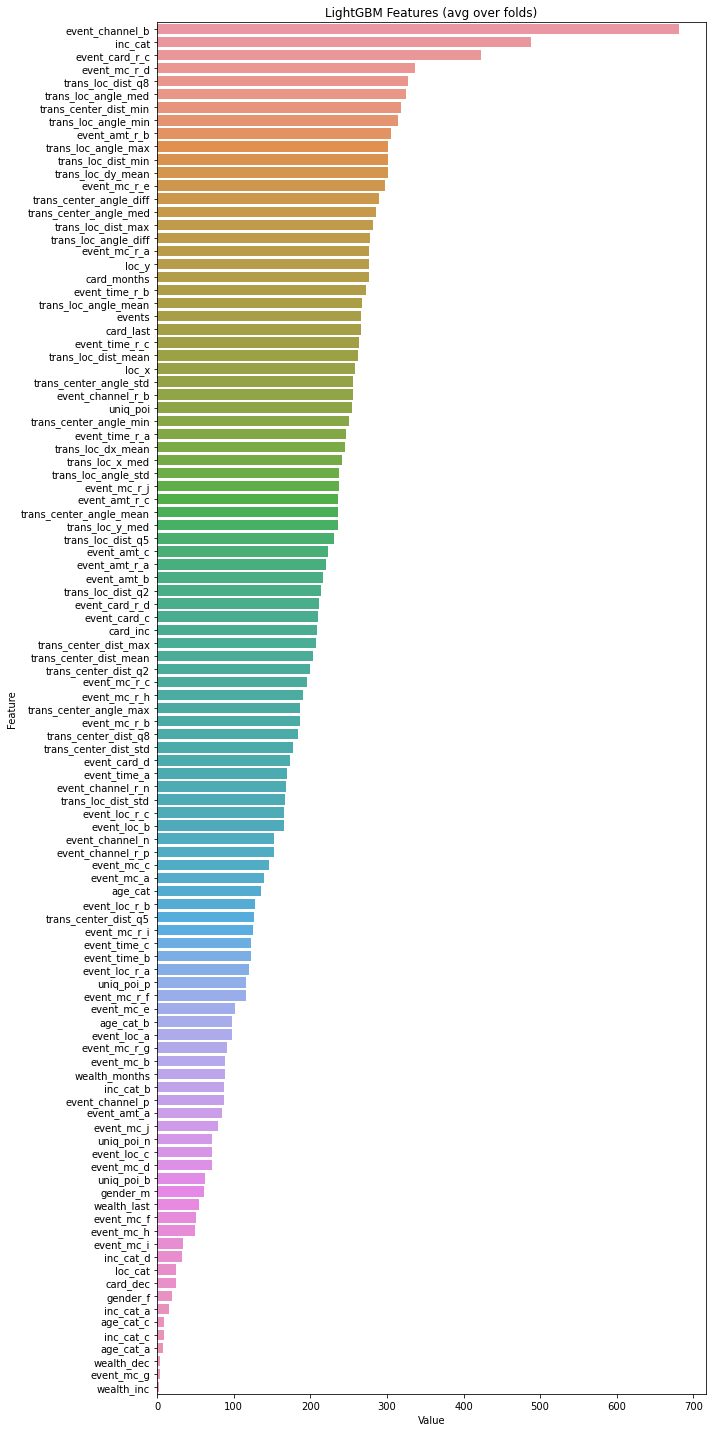

105
105


<Figure size 432x288 with 0 Axes>

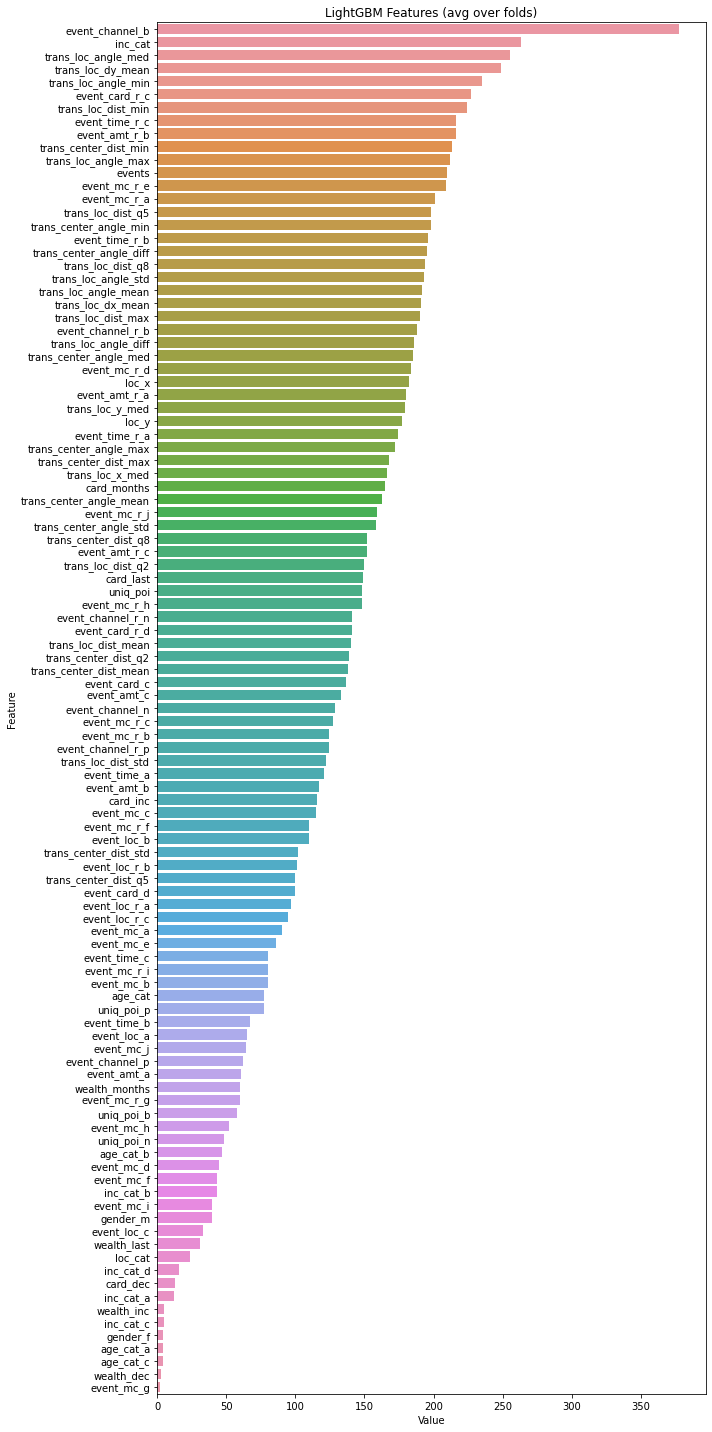

105
105


<Figure size 432x288 with 0 Axes>

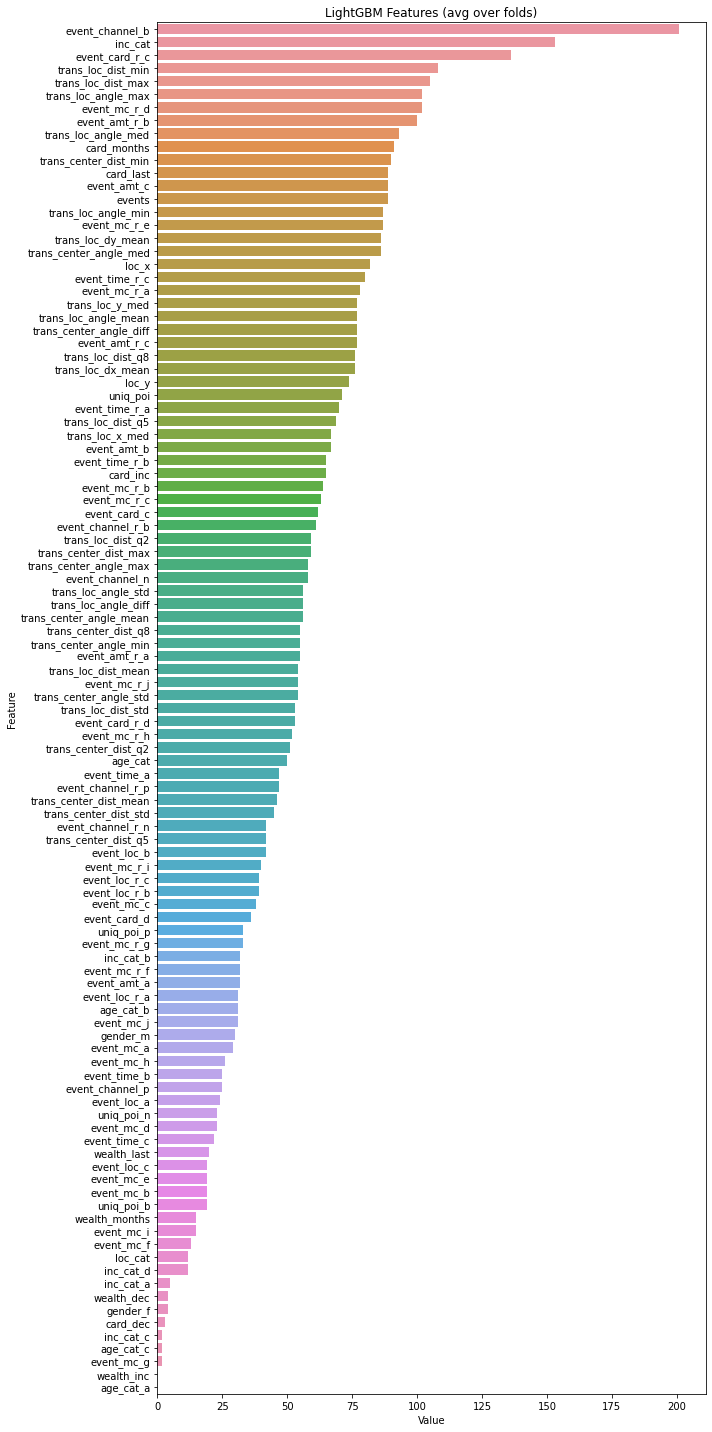

105
105


<Figure size 432x288 with 0 Axes>

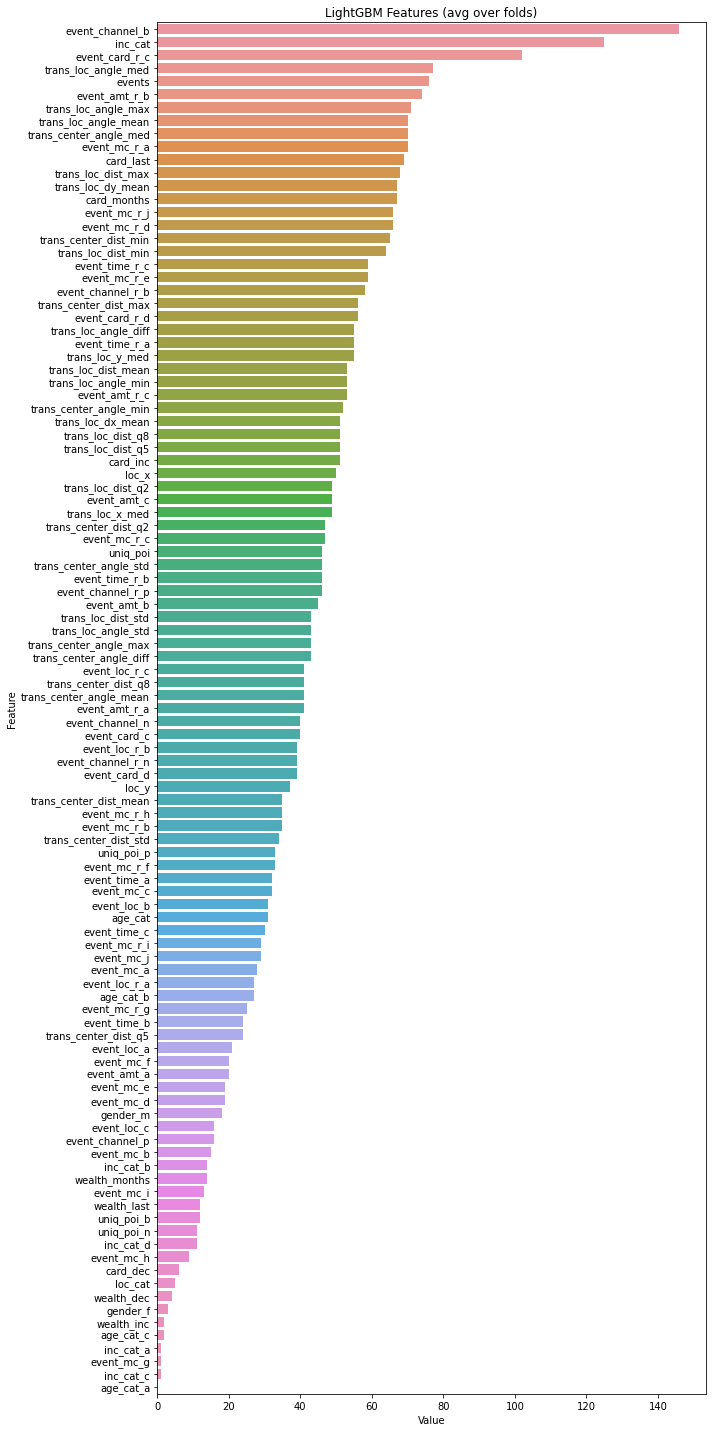

105
105


<Figure size 432x288 with 0 Axes>

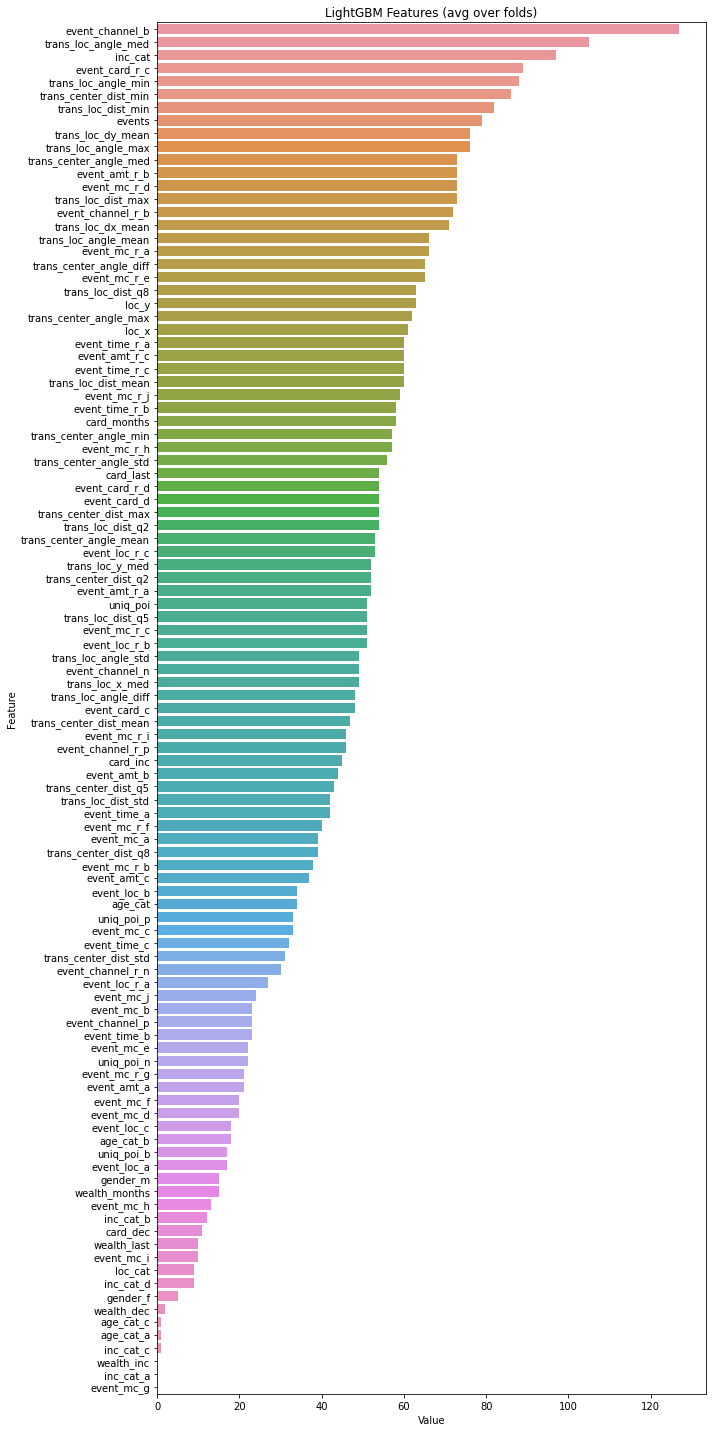

105
105


<Figure size 432x288 with 0 Axes>

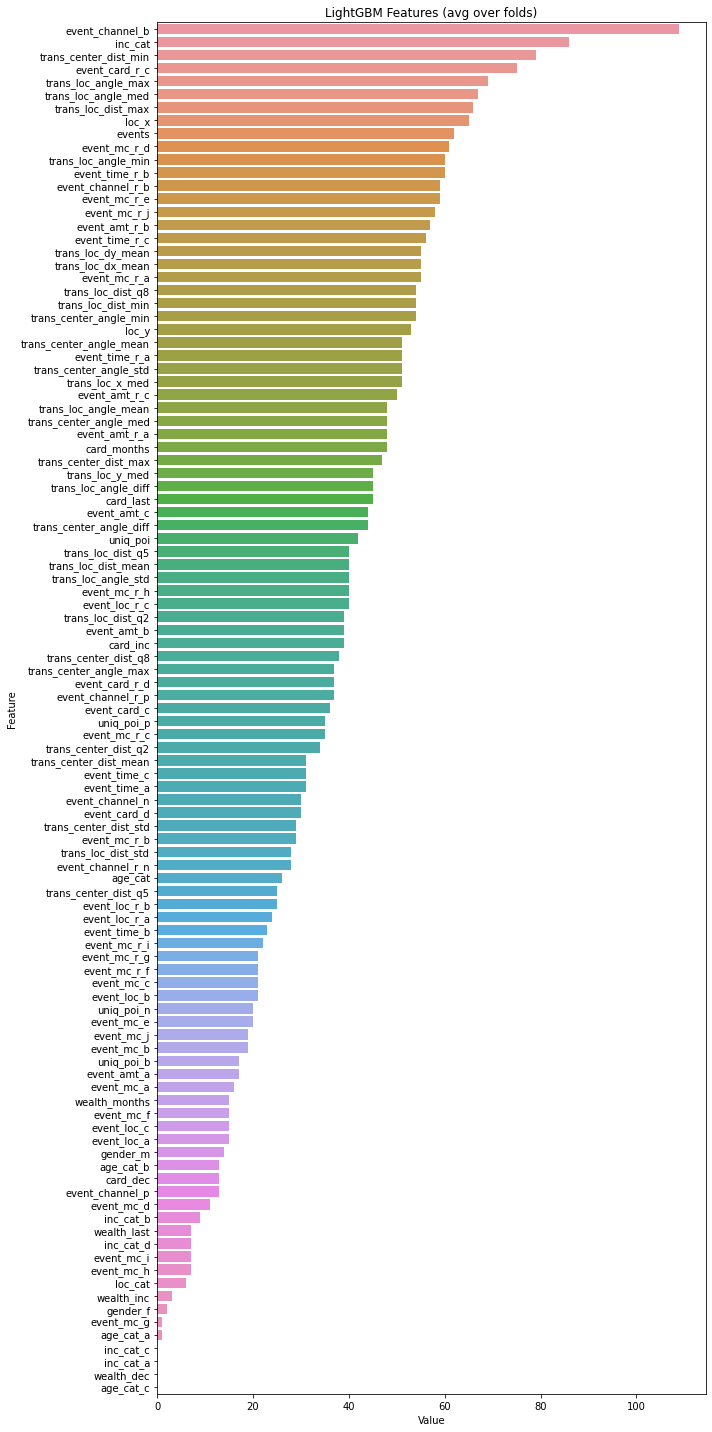

105
105


<Figure size 432x288 with 0 Axes>

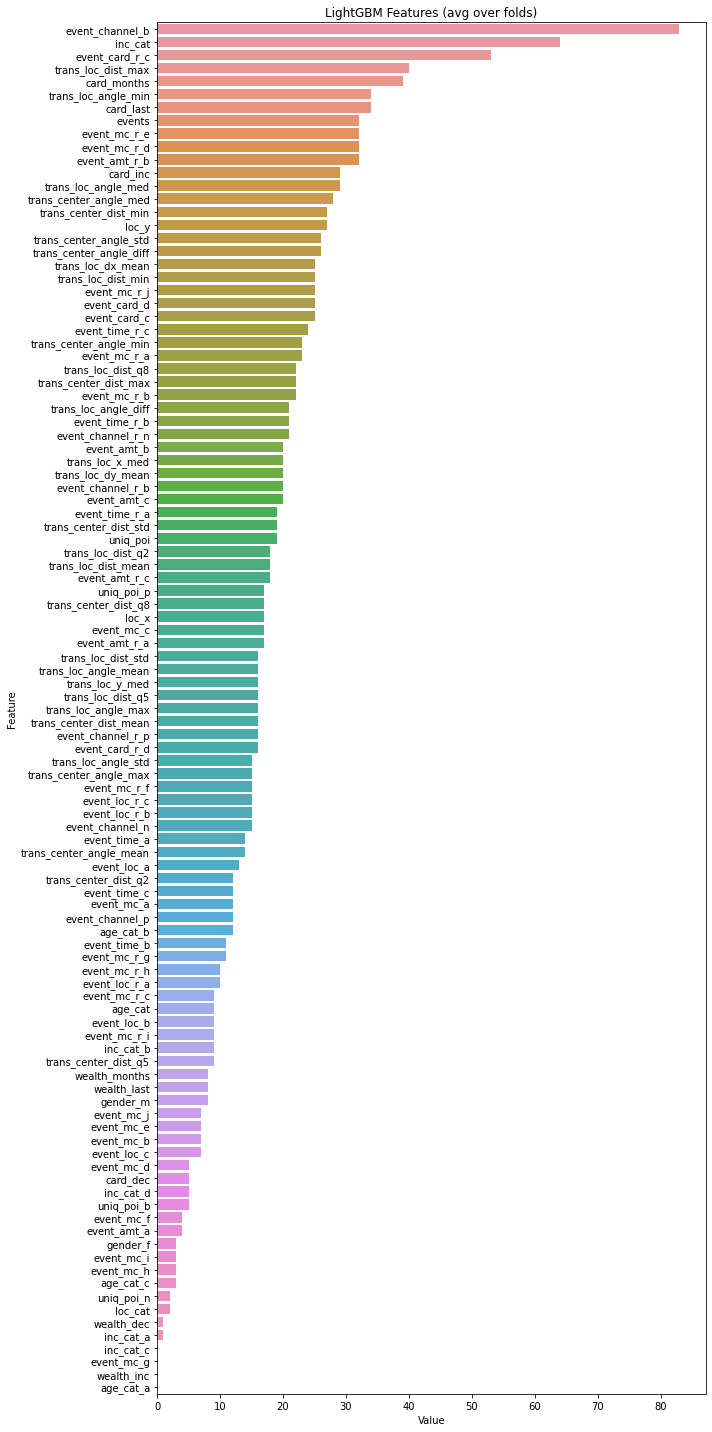

105
105


<Figure size 432x288 with 0 Axes>

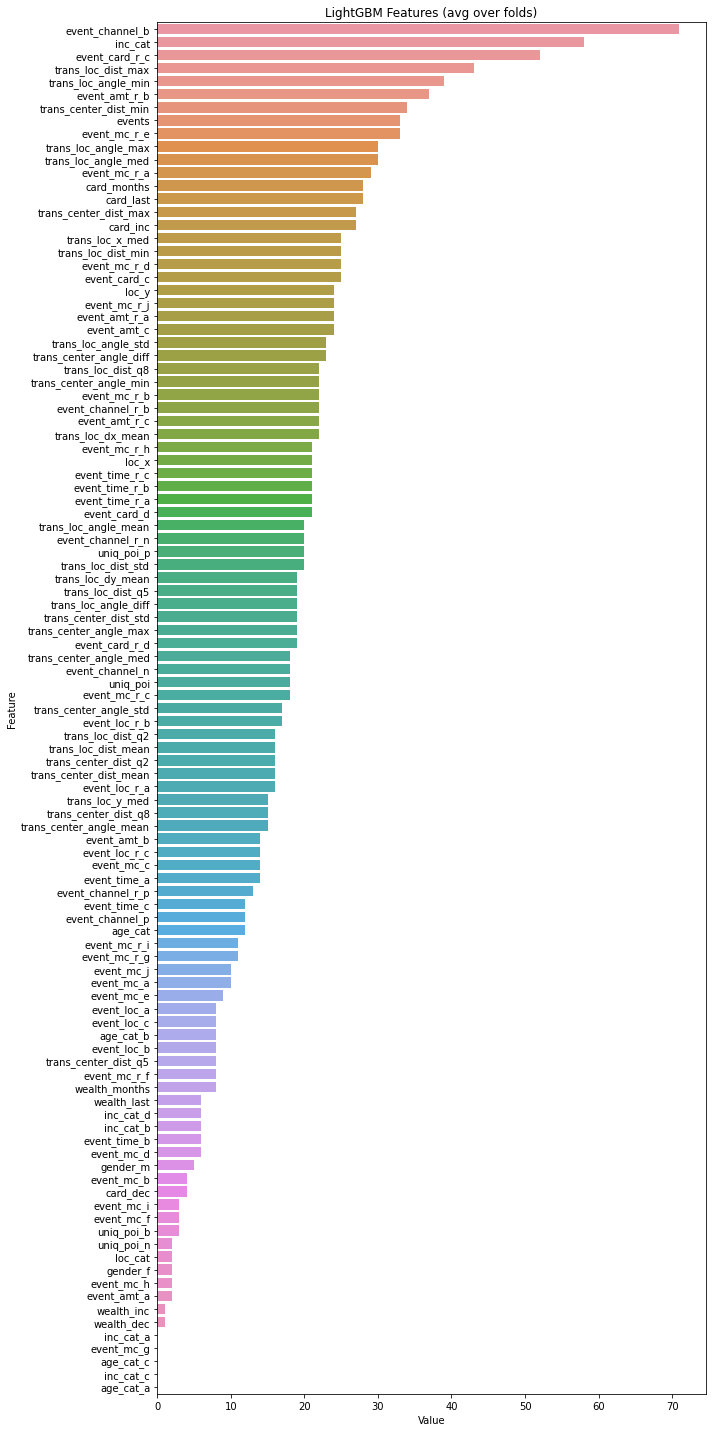

105
105


<Figure size 432x288 with 0 Axes>

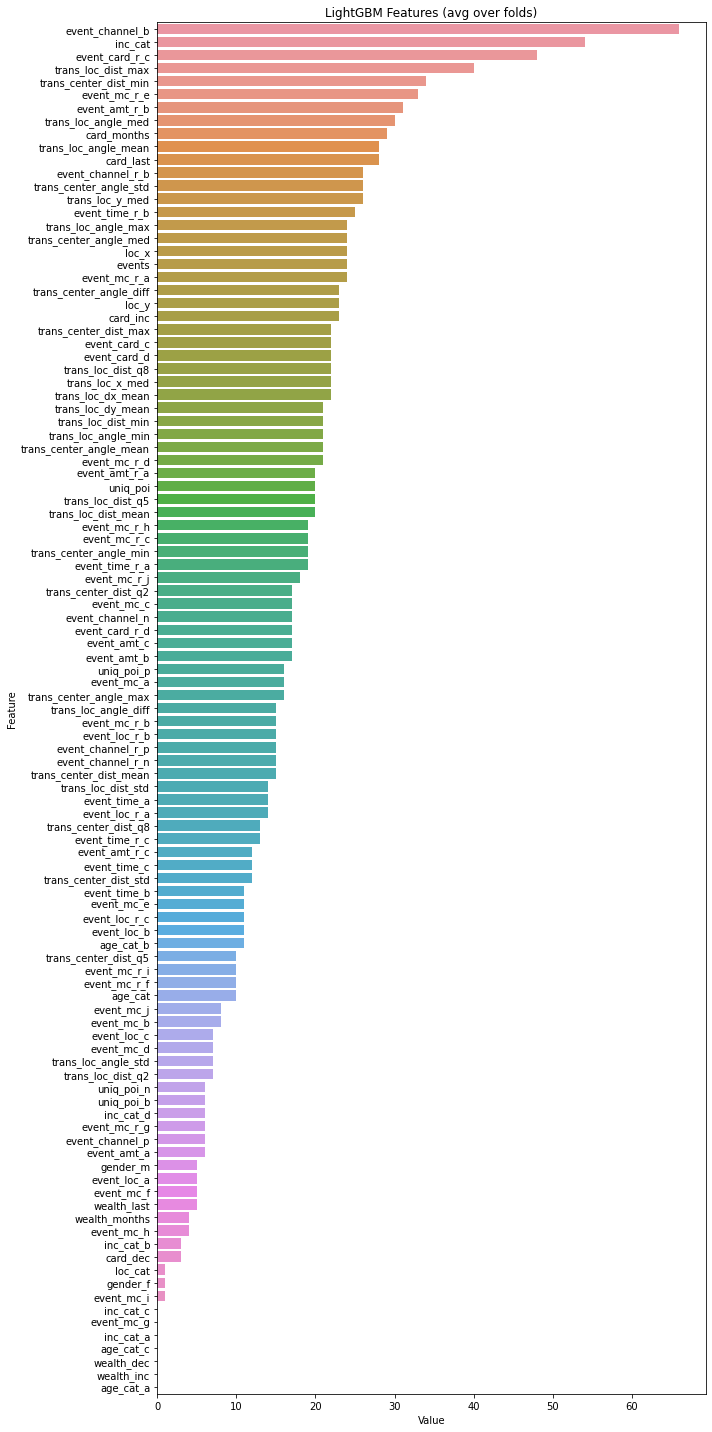

105
105


<Figure size 432x288 with 0 Axes>

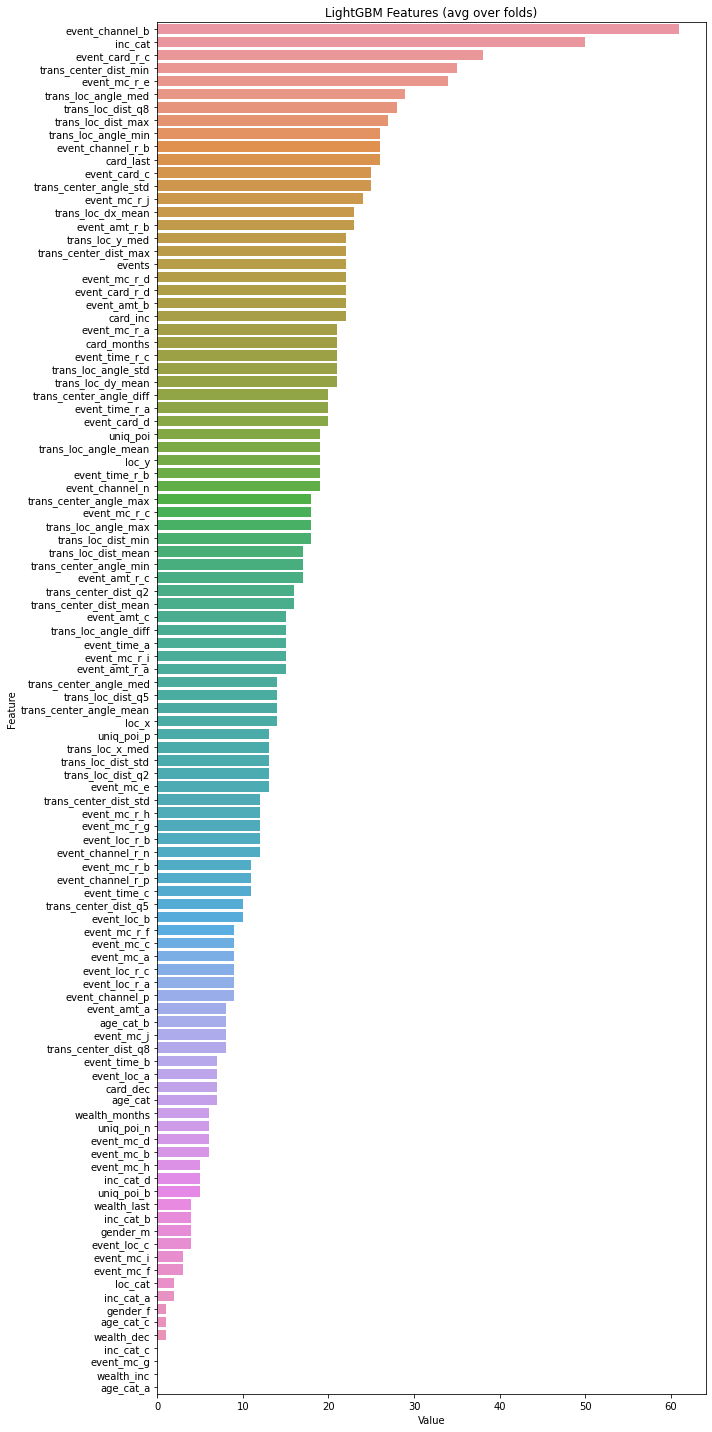

105
105


<Figure size 432x288 with 0 Axes>

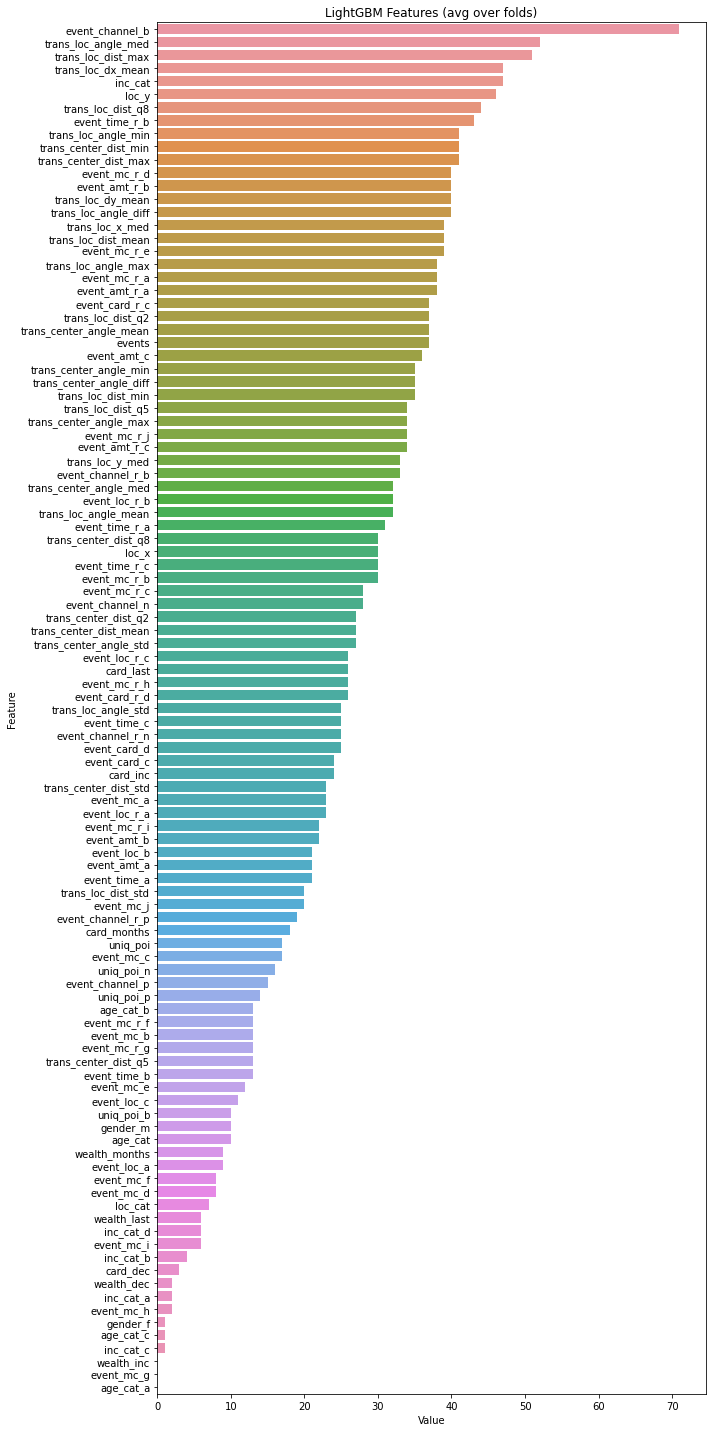

105
105


<Figure size 432x288 with 0 Axes>

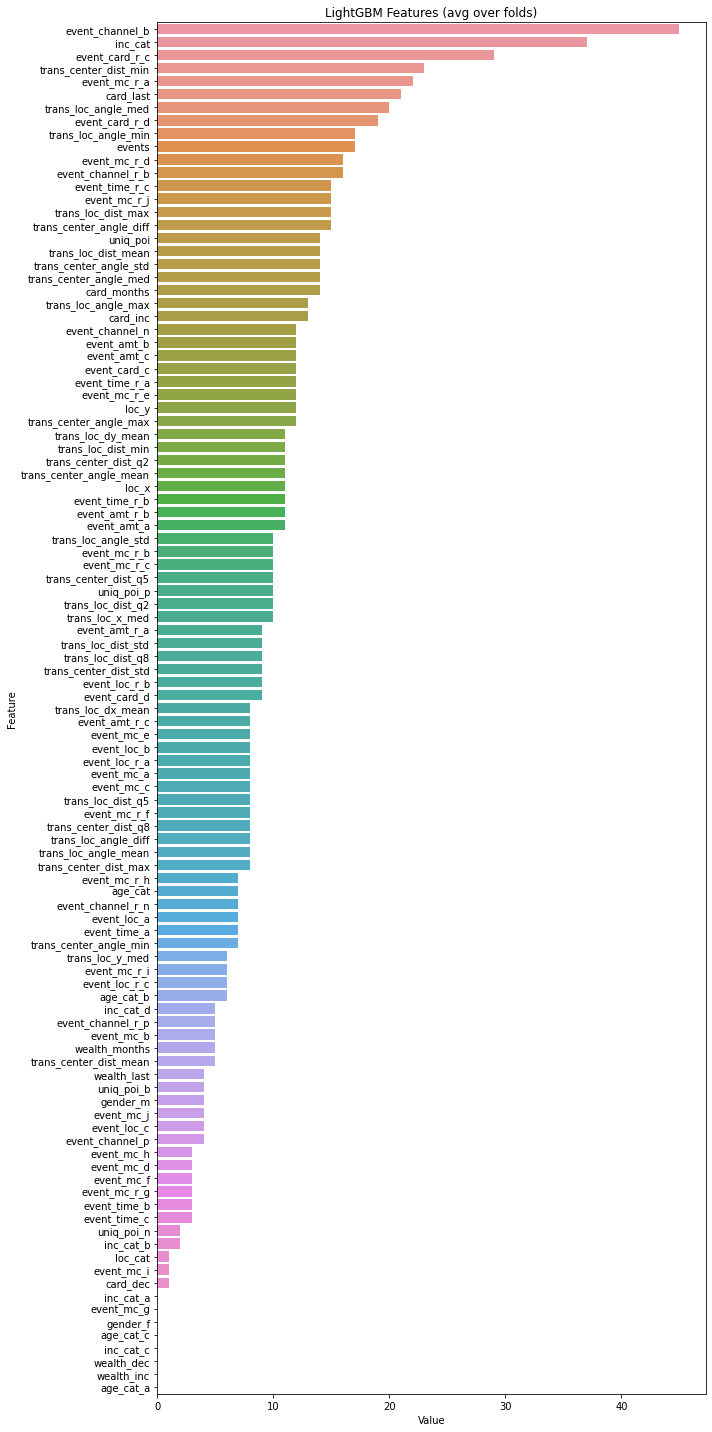

105
105


<Figure size 432x288 with 0 Axes>

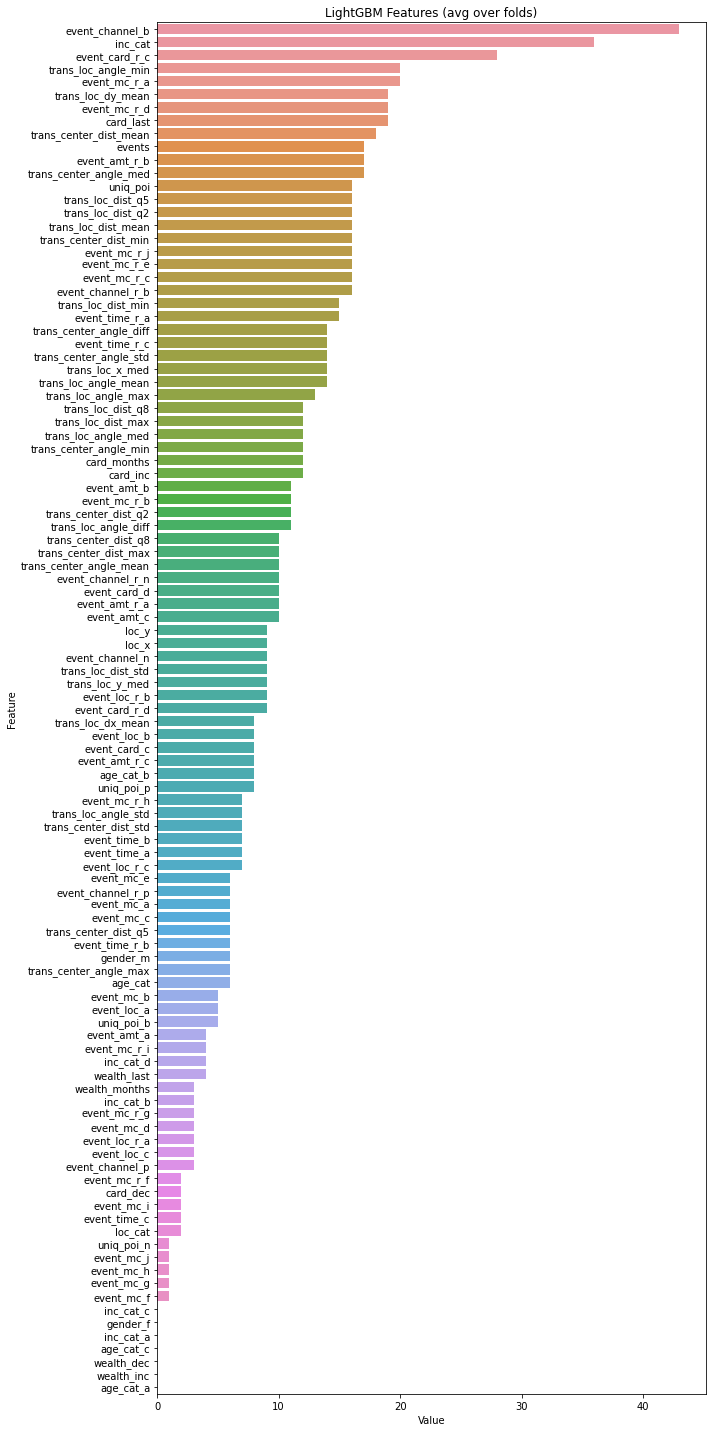

105
105


<Figure size 432x288 with 0 Axes>

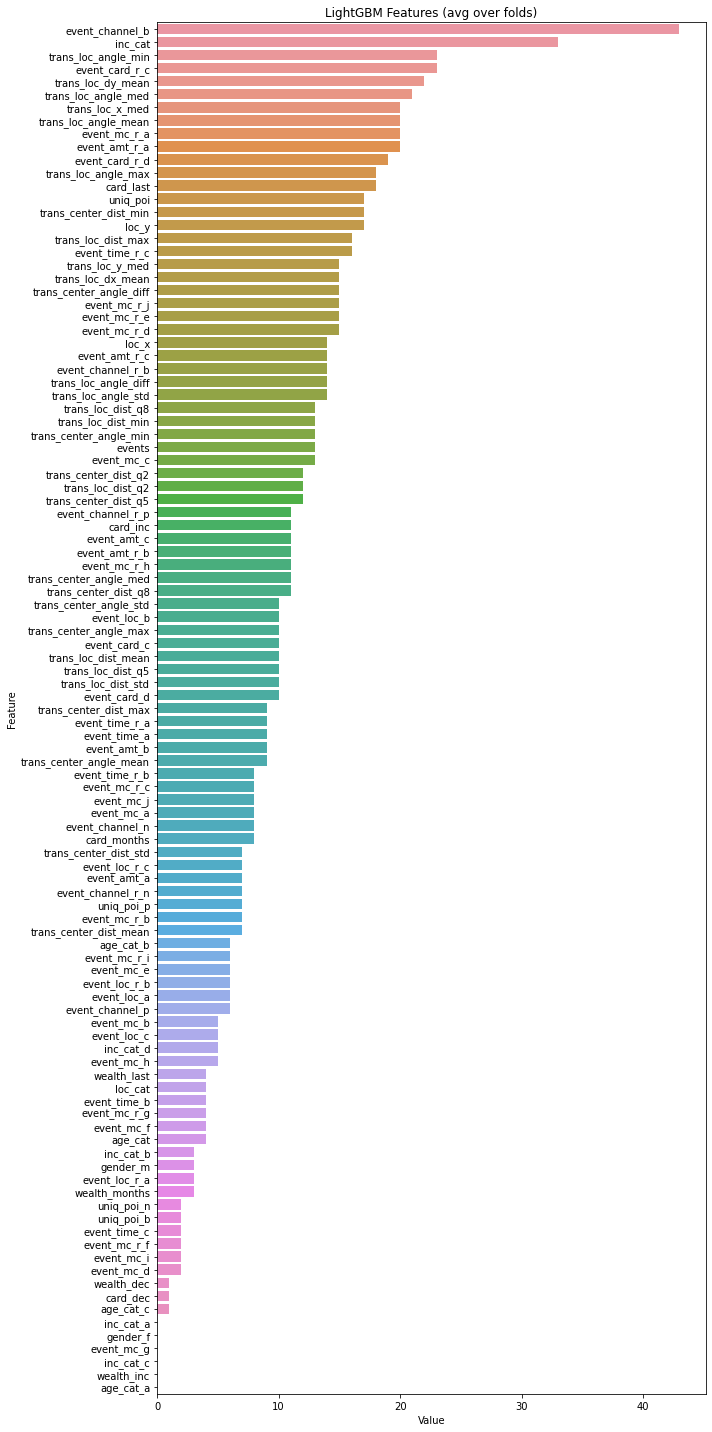

105
105


<Figure size 432x288 with 0 Axes>

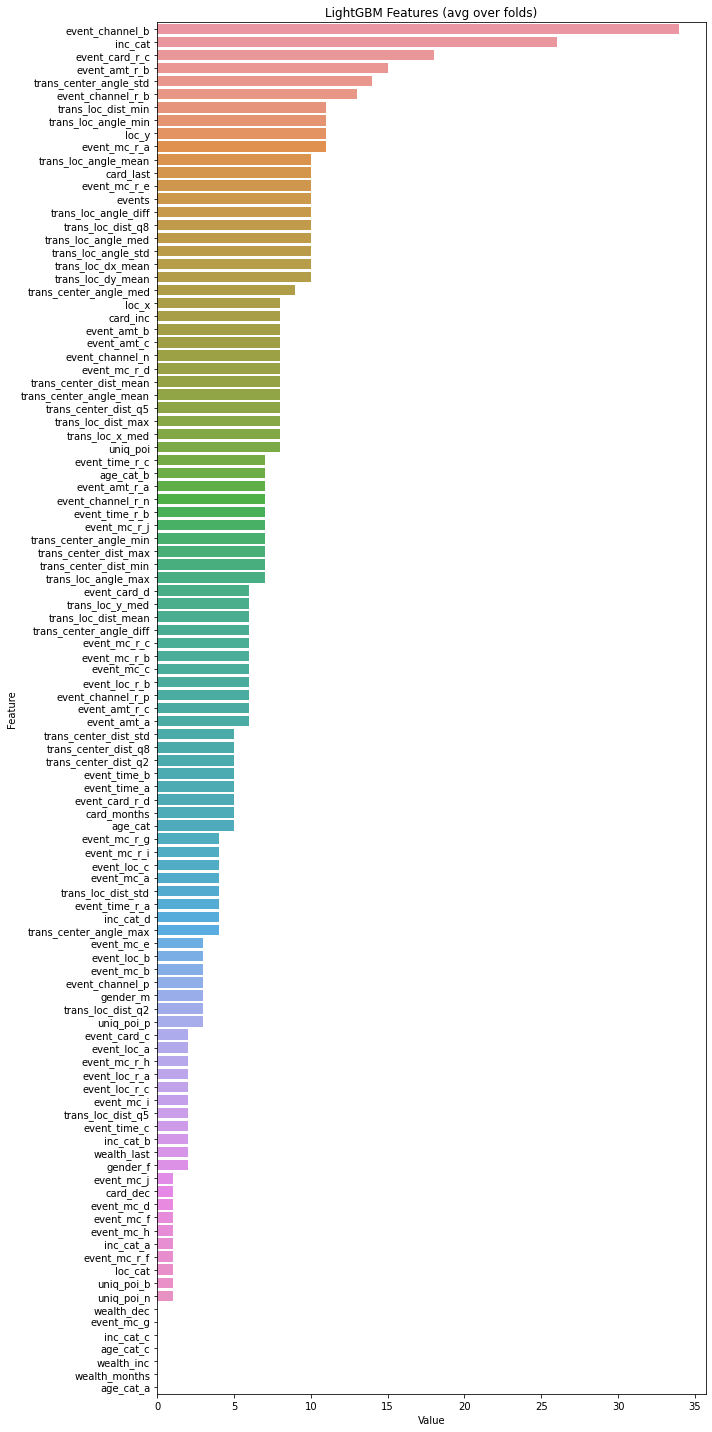

105
105


<Figure size 432x288 with 0 Axes>

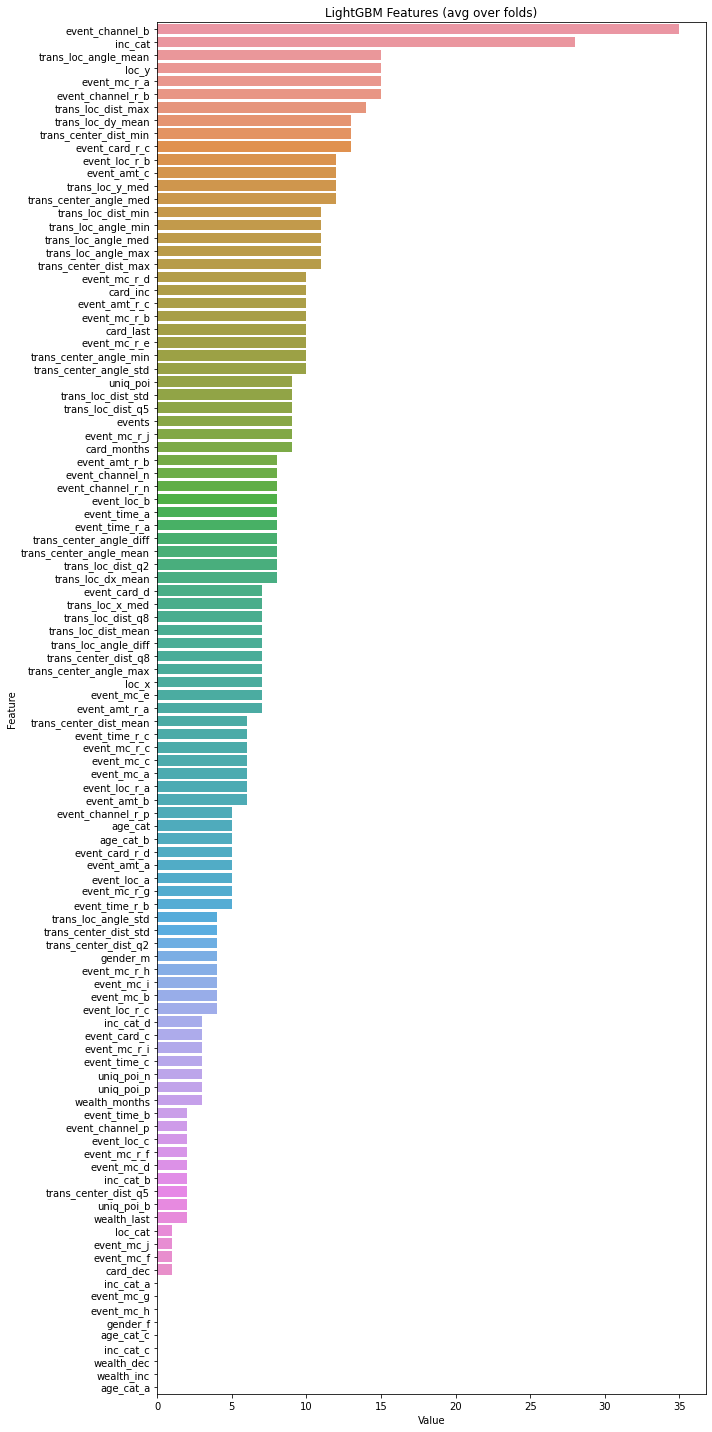

105
105


<Figure size 432x288 with 0 Axes>

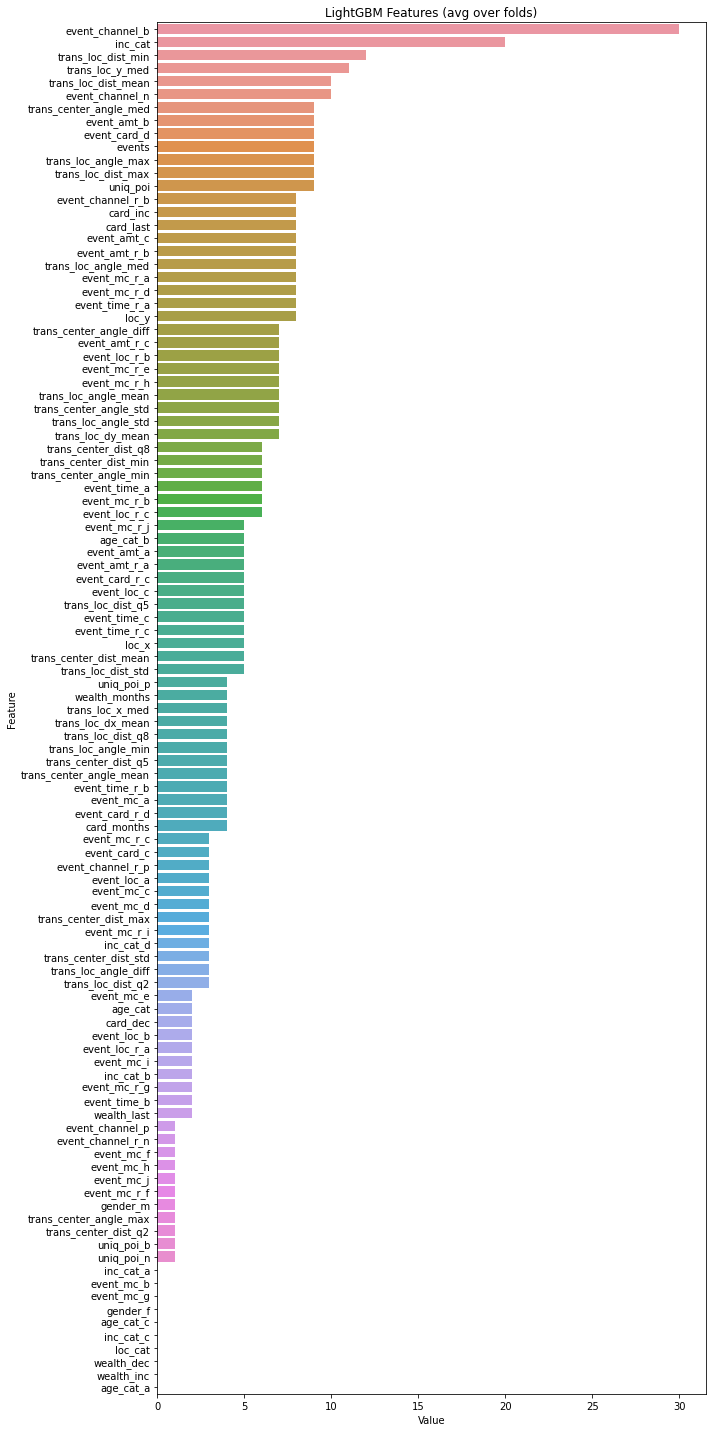

105
105


<Figure size 432x288 with 0 Axes>

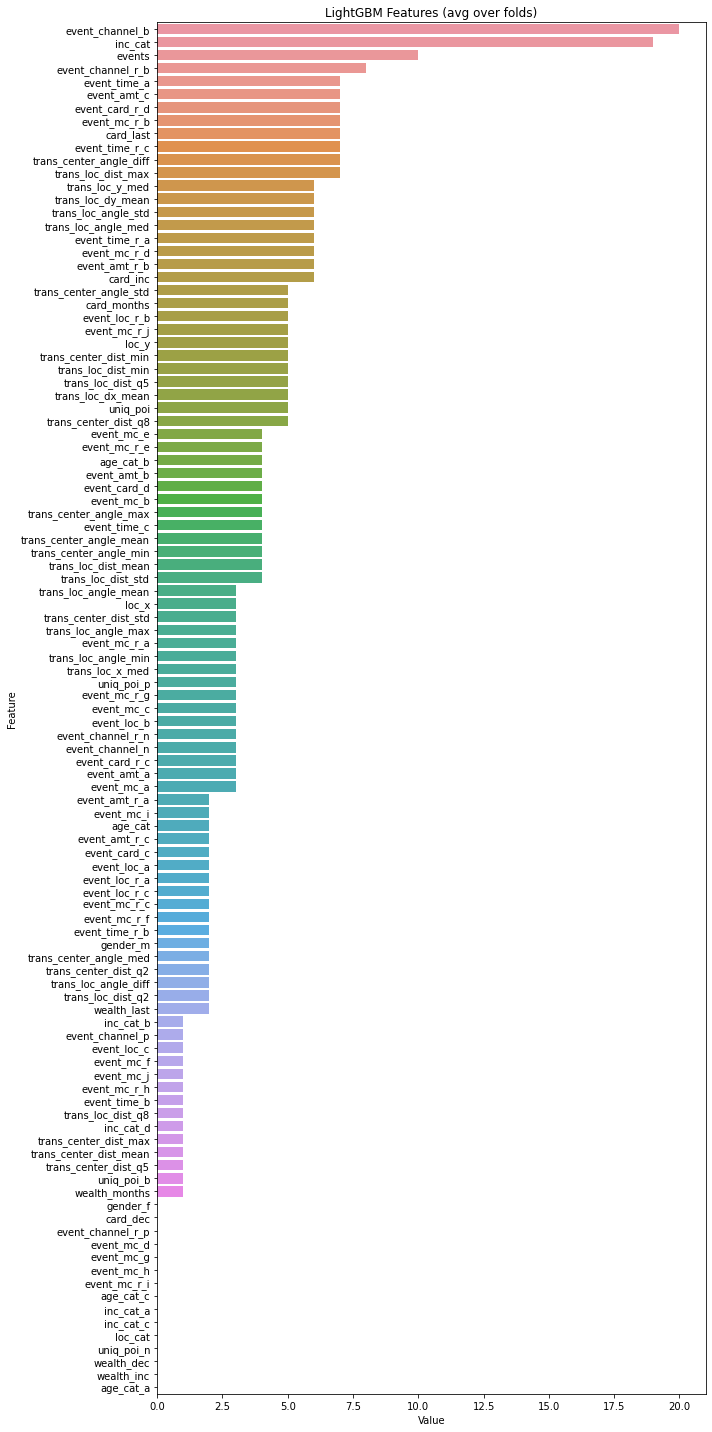

105
105


<Figure size 432x288 with 0 Axes>

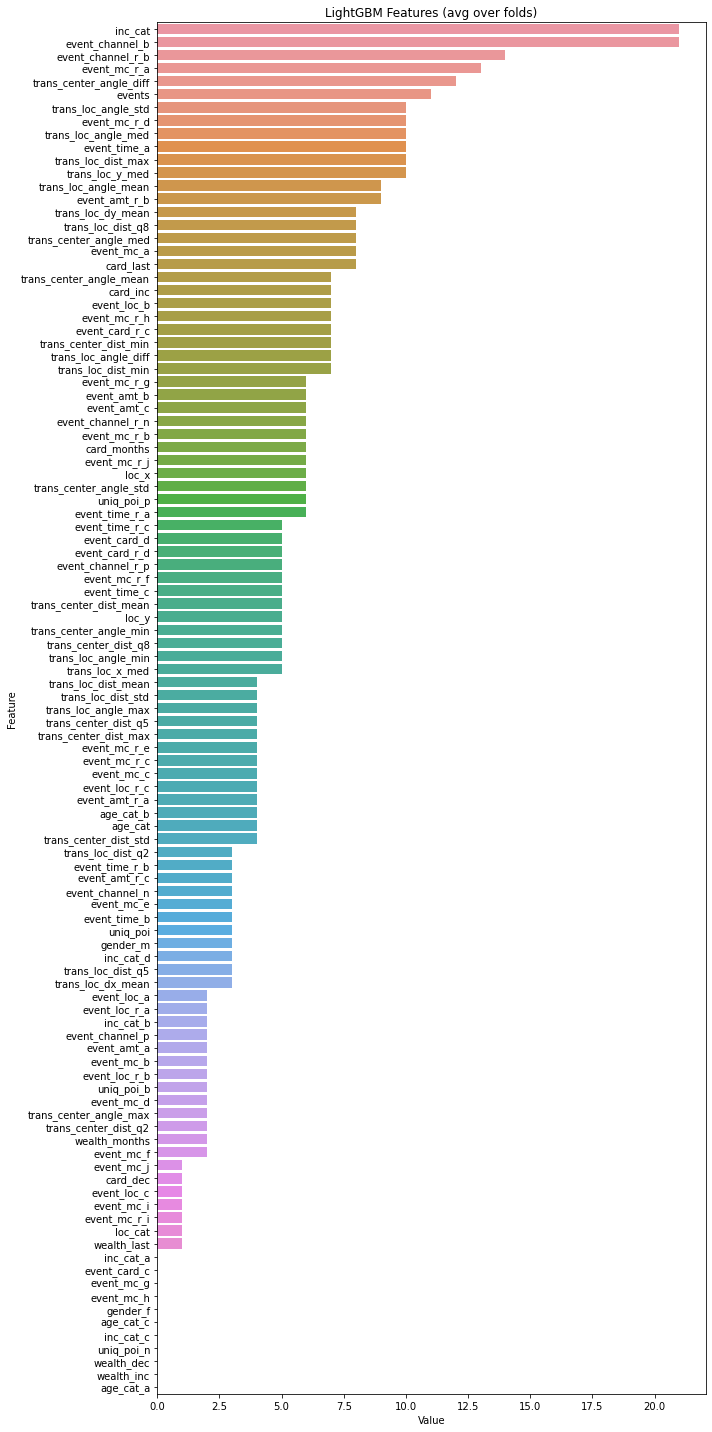

105
105


<Figure size 432x288 with 0 Axes>

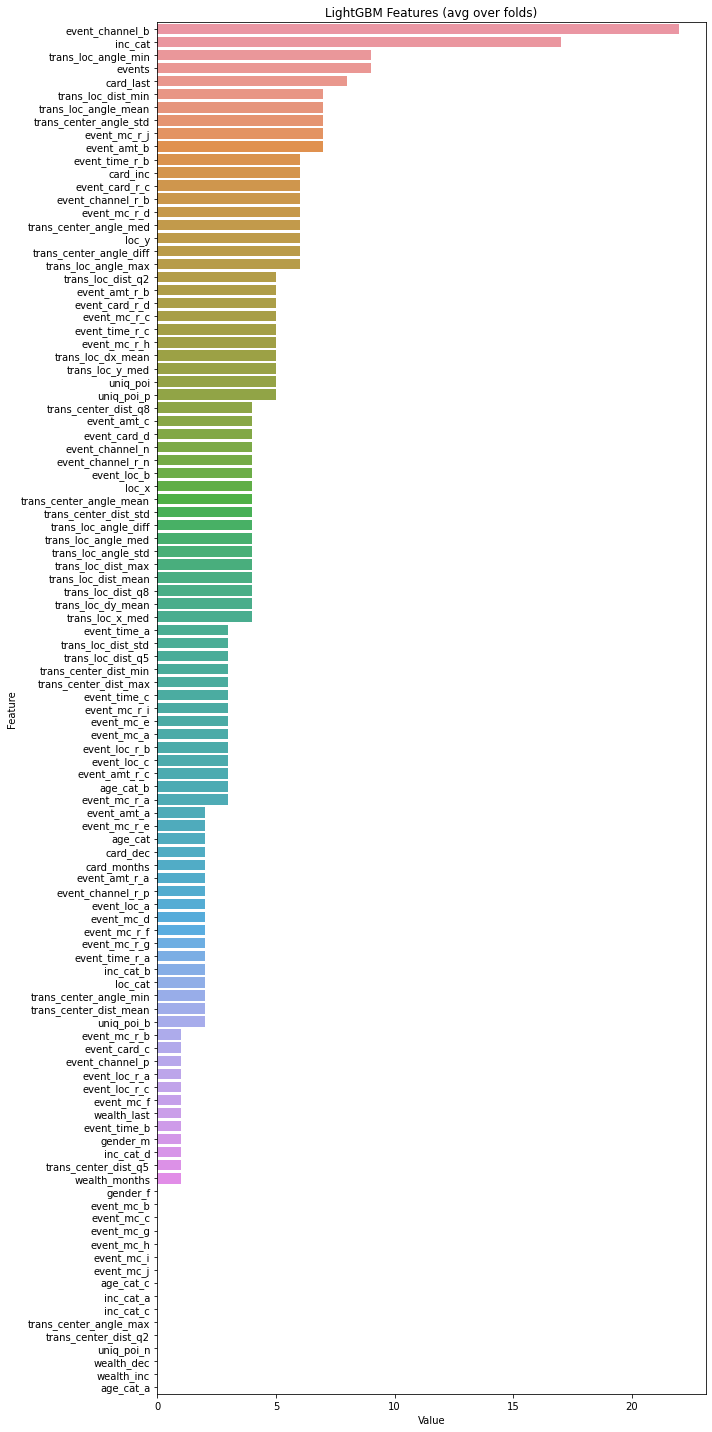

105
105


<Figure size 432x288 with 0 Axes>

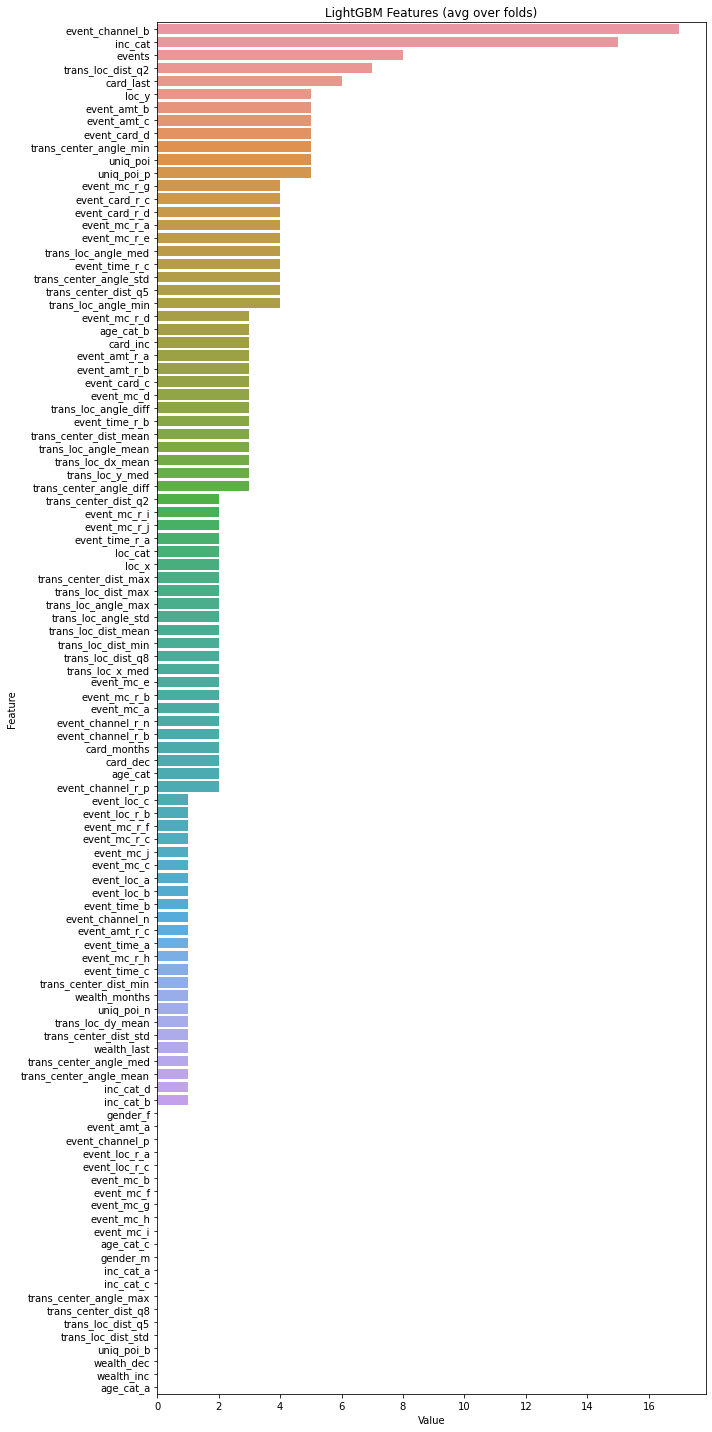

105
105


<Figure size 432x288 with 0 Axes>

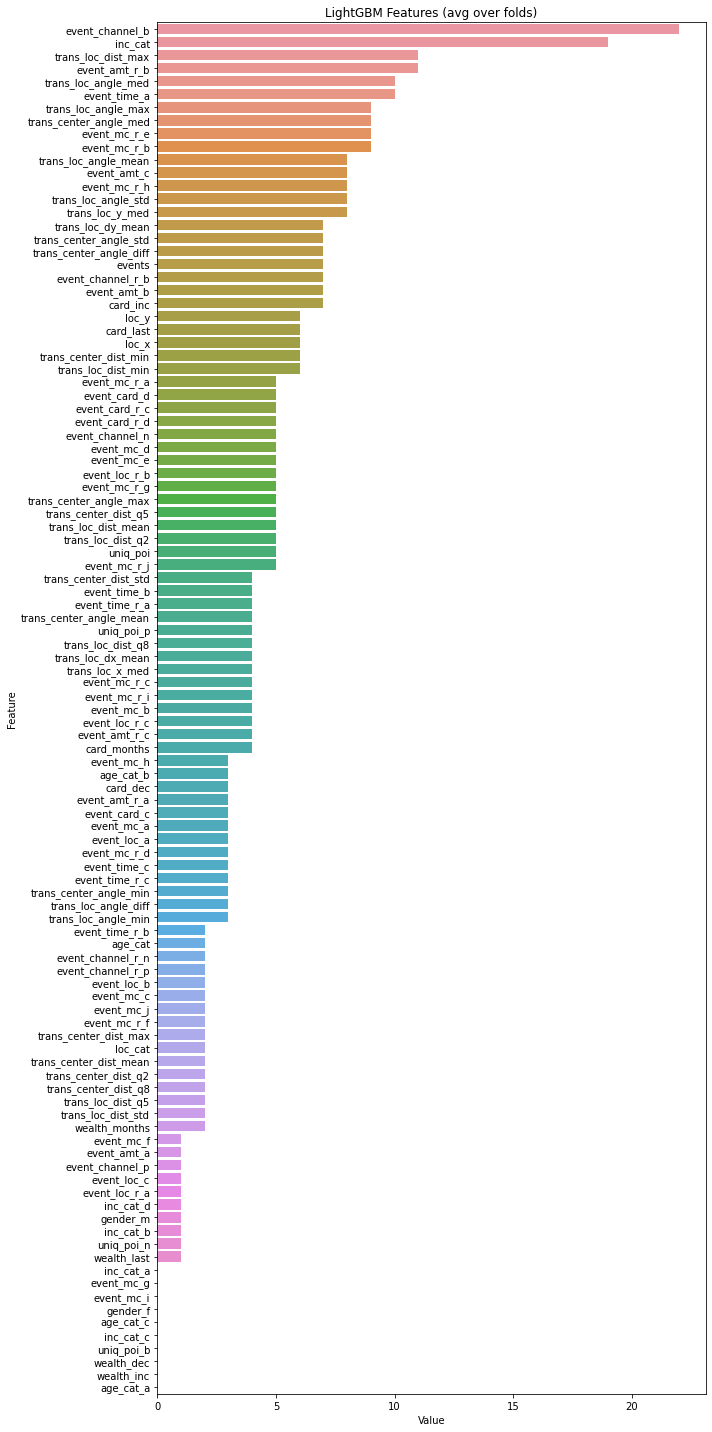

105
105


<Figure size 432x288 with 0 Axes>

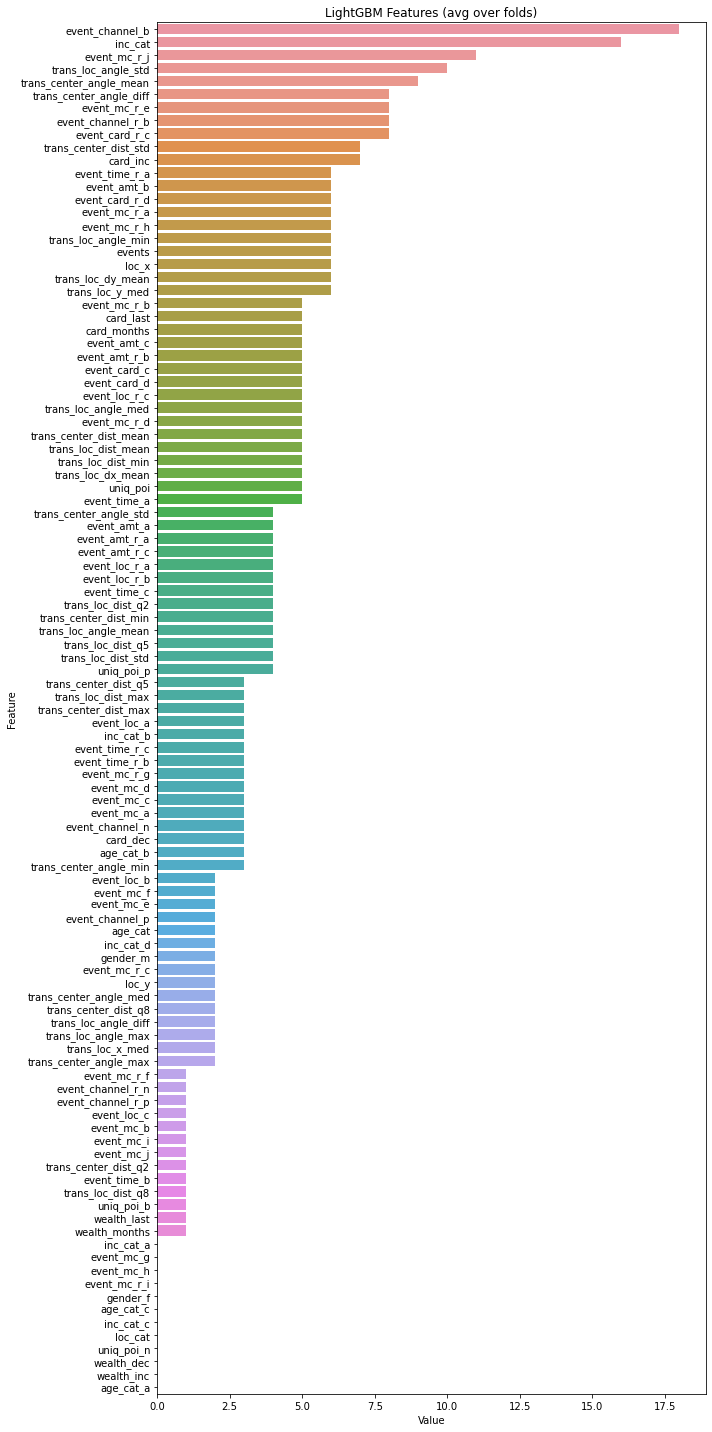

105
105


<Figure size 432x288 with 0 Axes>

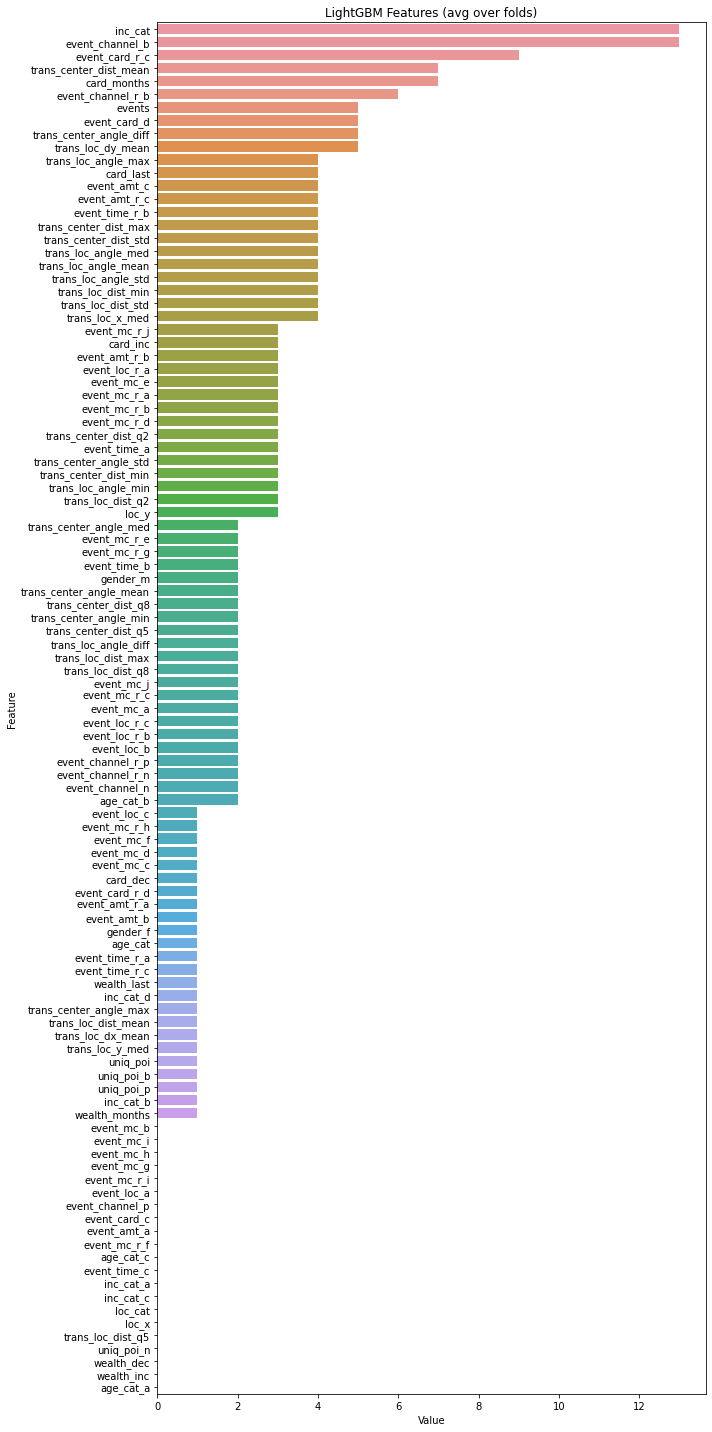

105
105


<Figure size 432x288 with 0 Axes>

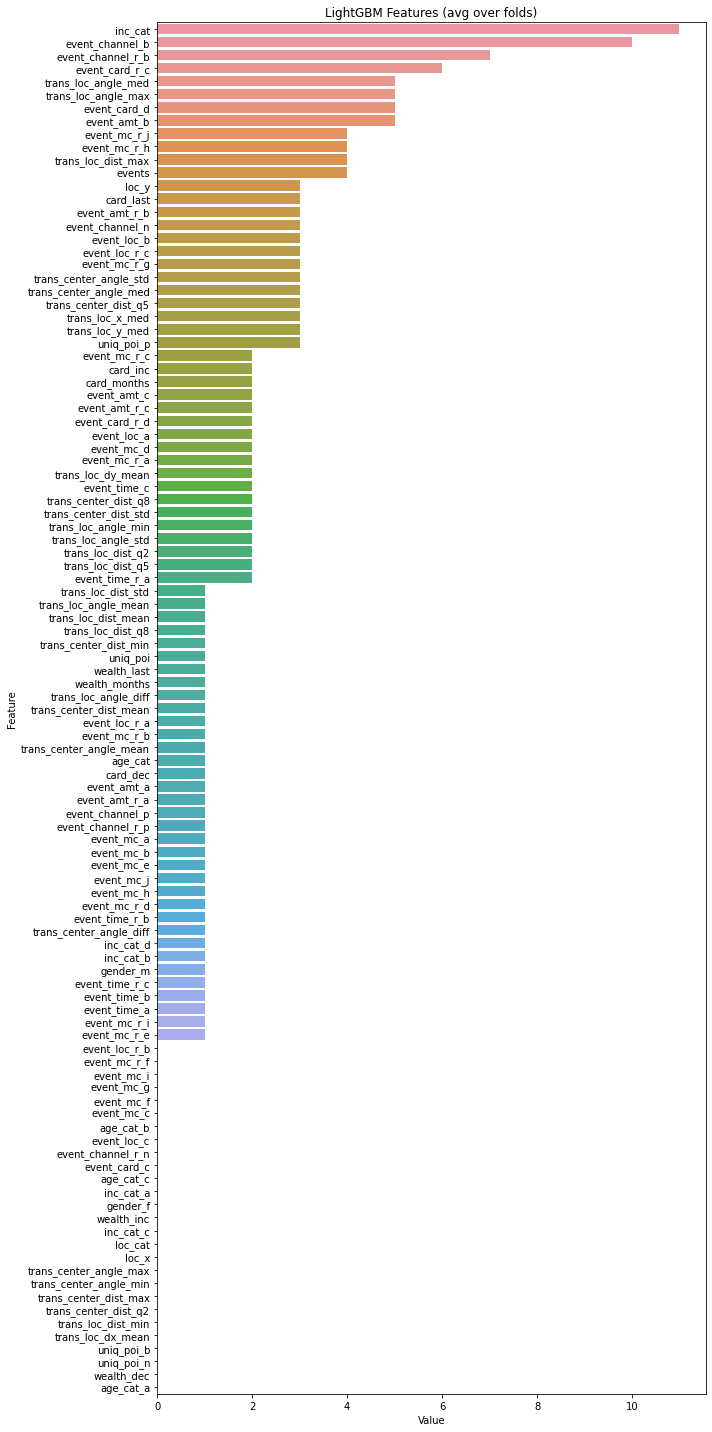

105
105


<Figure size 432x288 with 0 Axes>

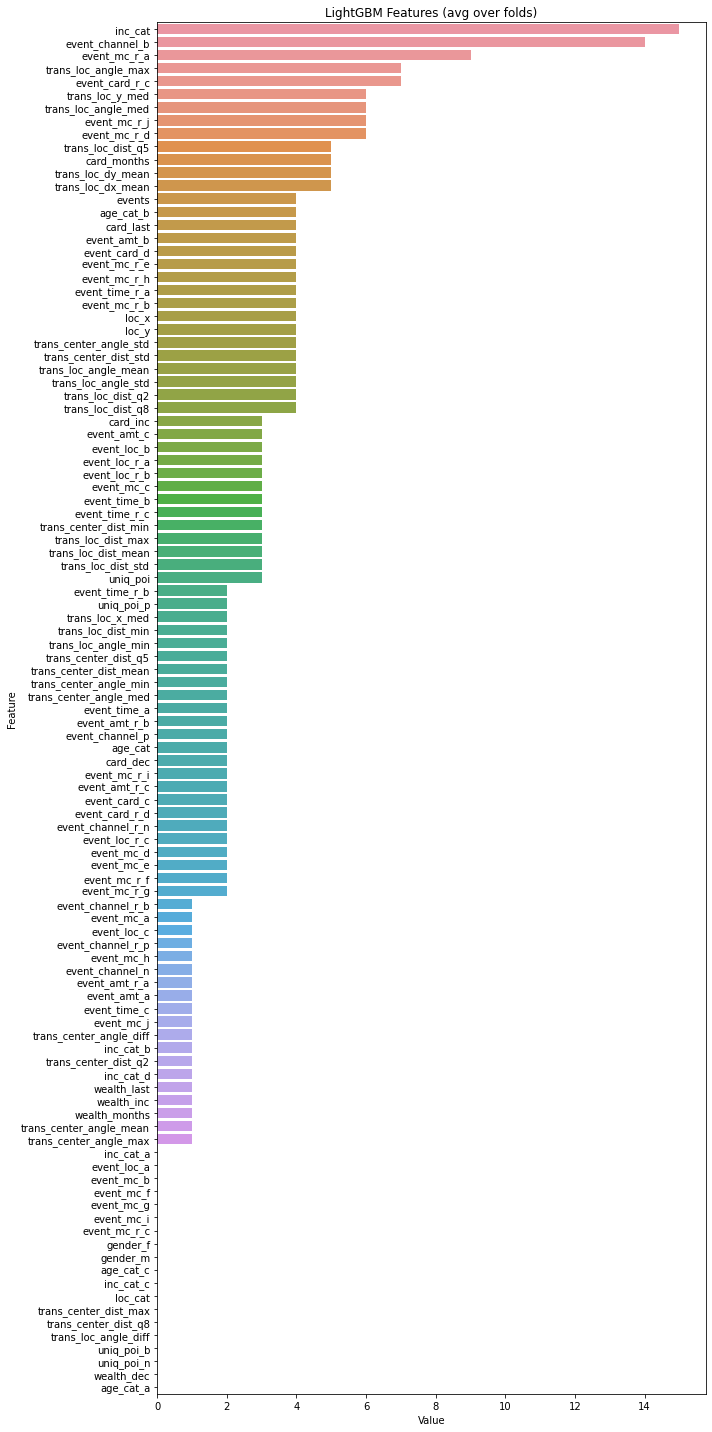

105
105


<Figure size 432x288 with 0 Axes>

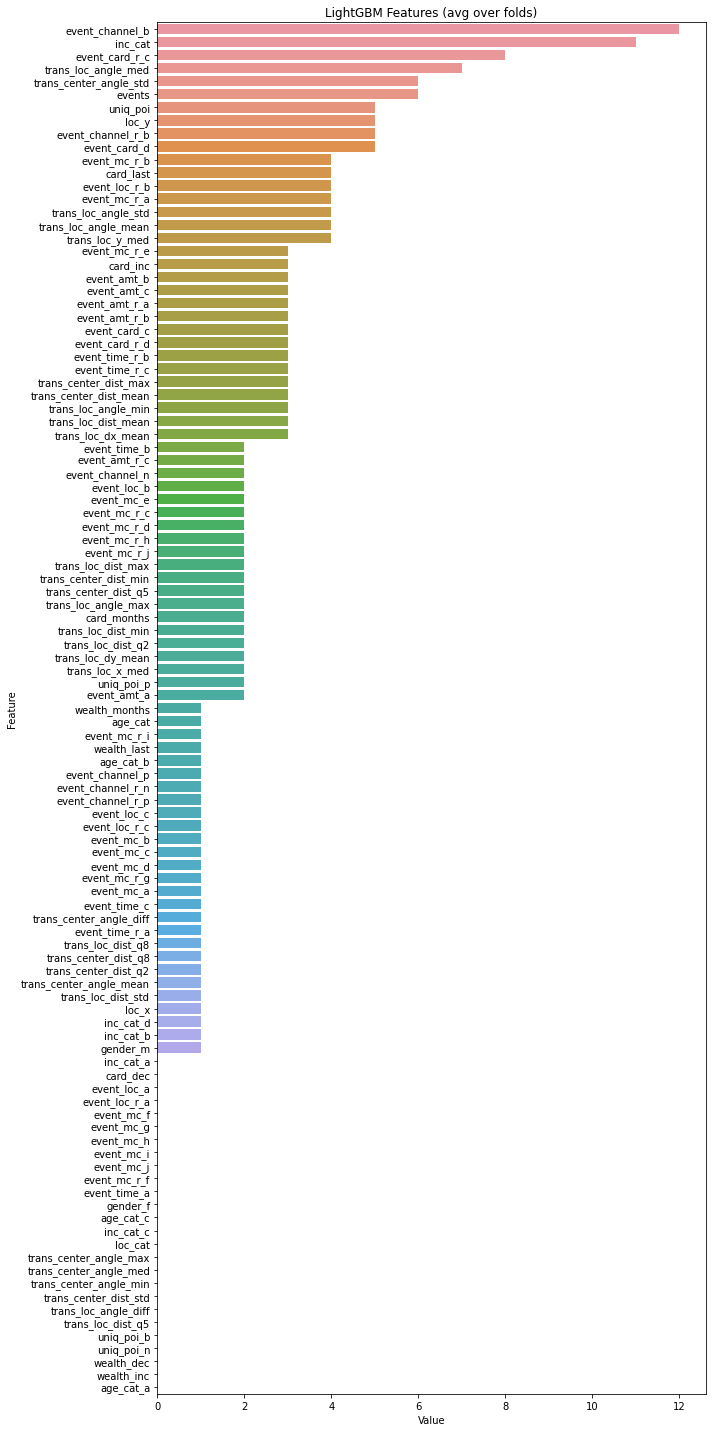

105
105


<Figure size 432x288 with 0 Axes>

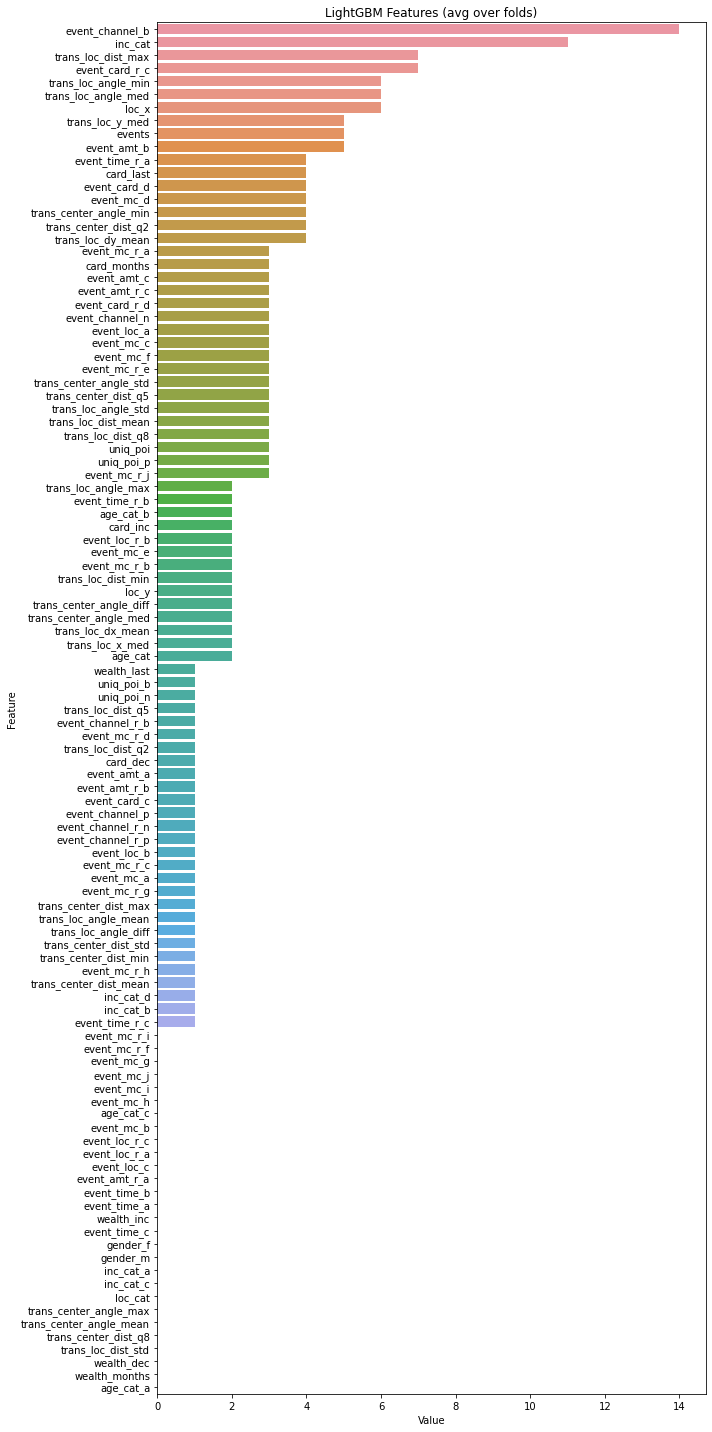

105
105


<Figure size 432x288 with 0 Axes>

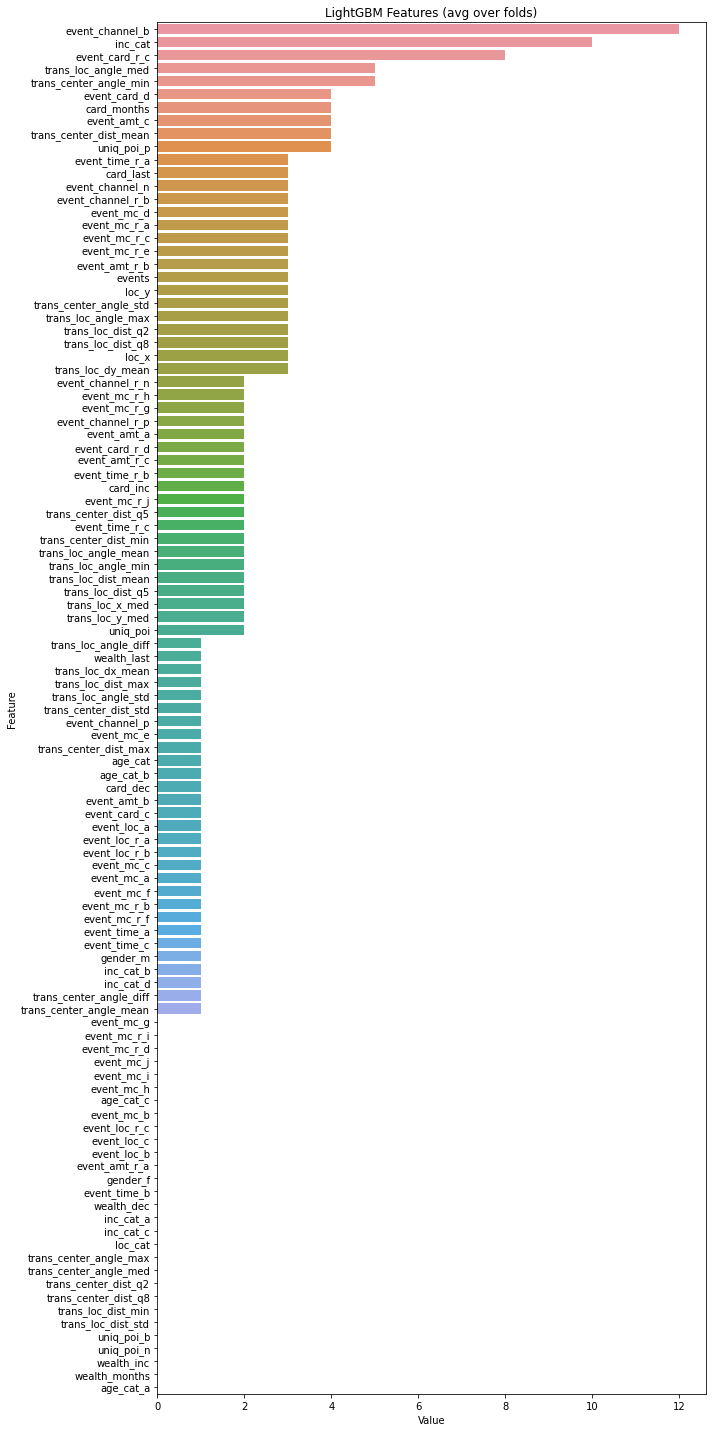

105
105


<Figure size 432x288 with 0 Axes>

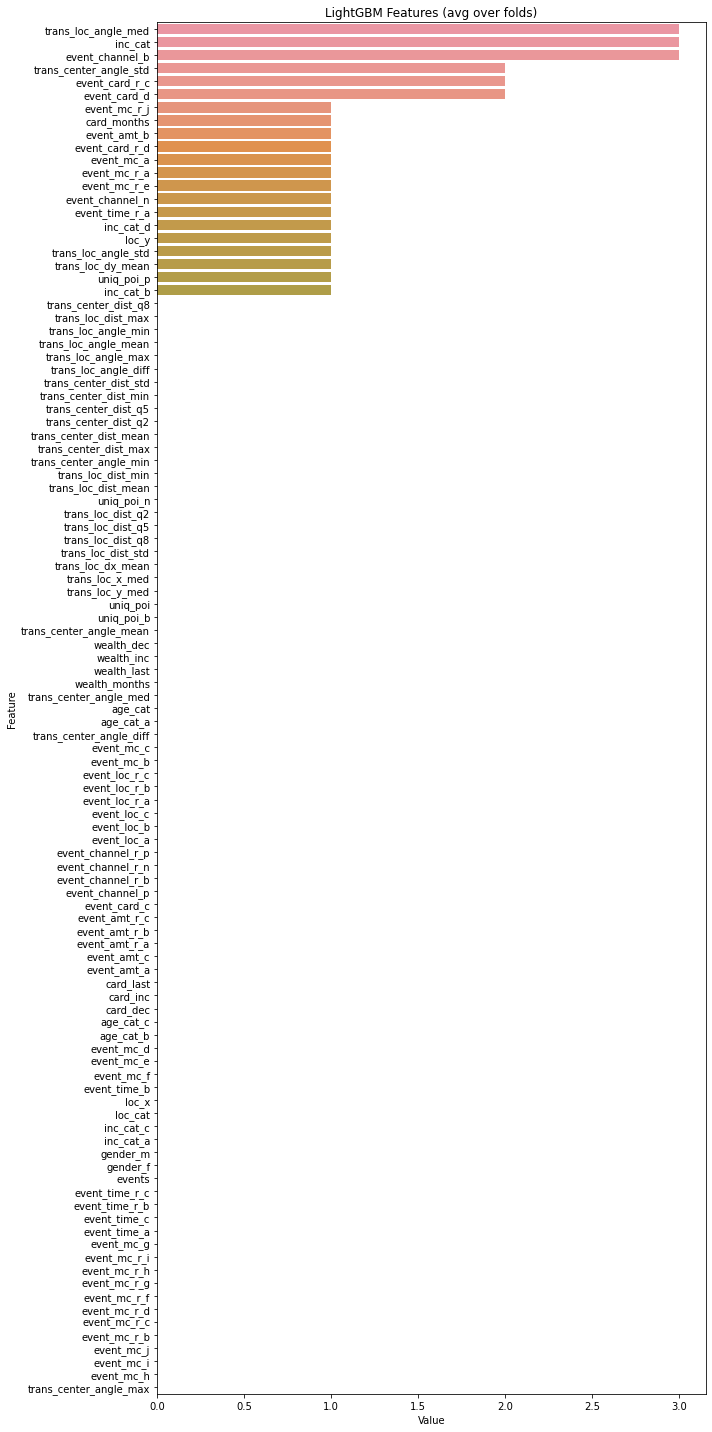

105
105


<Figure size 432x288 with 0 Axes>

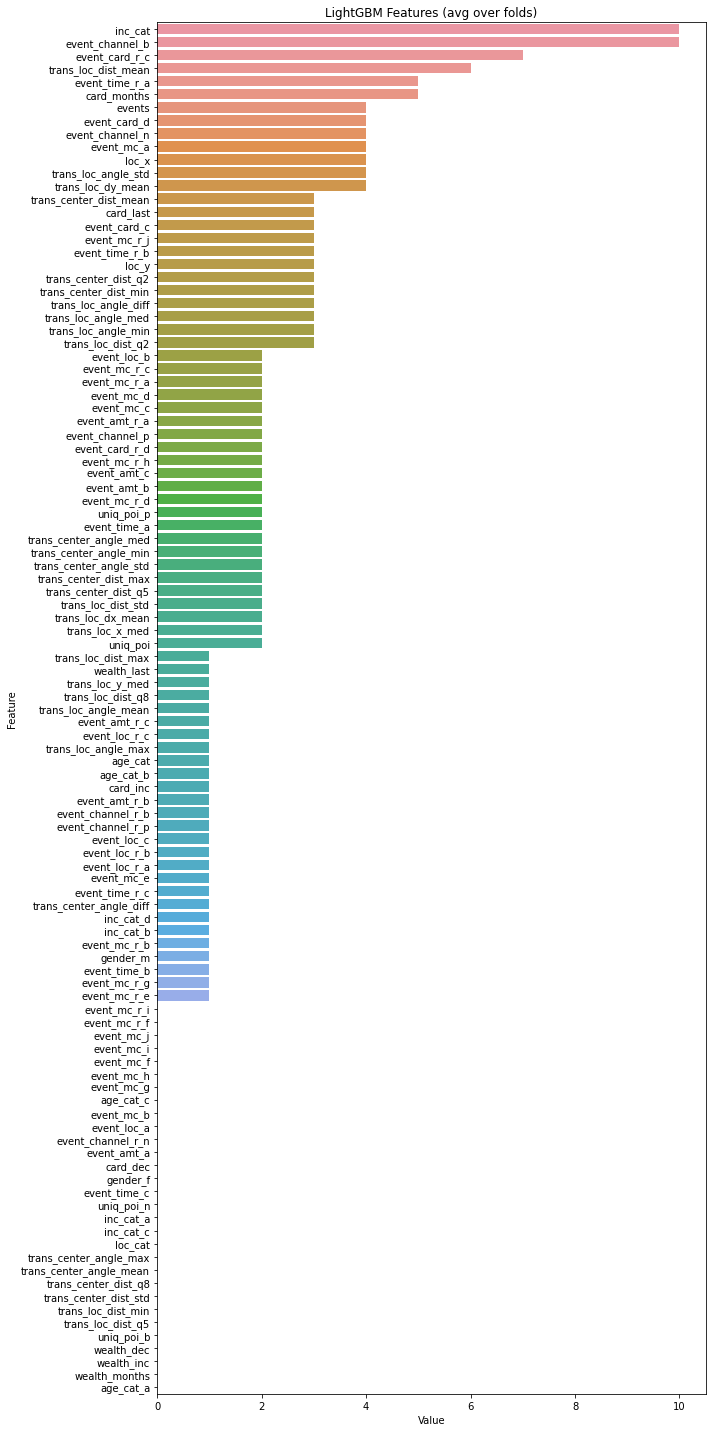

105
105


<Figure size 432x288 with 0 Axes>

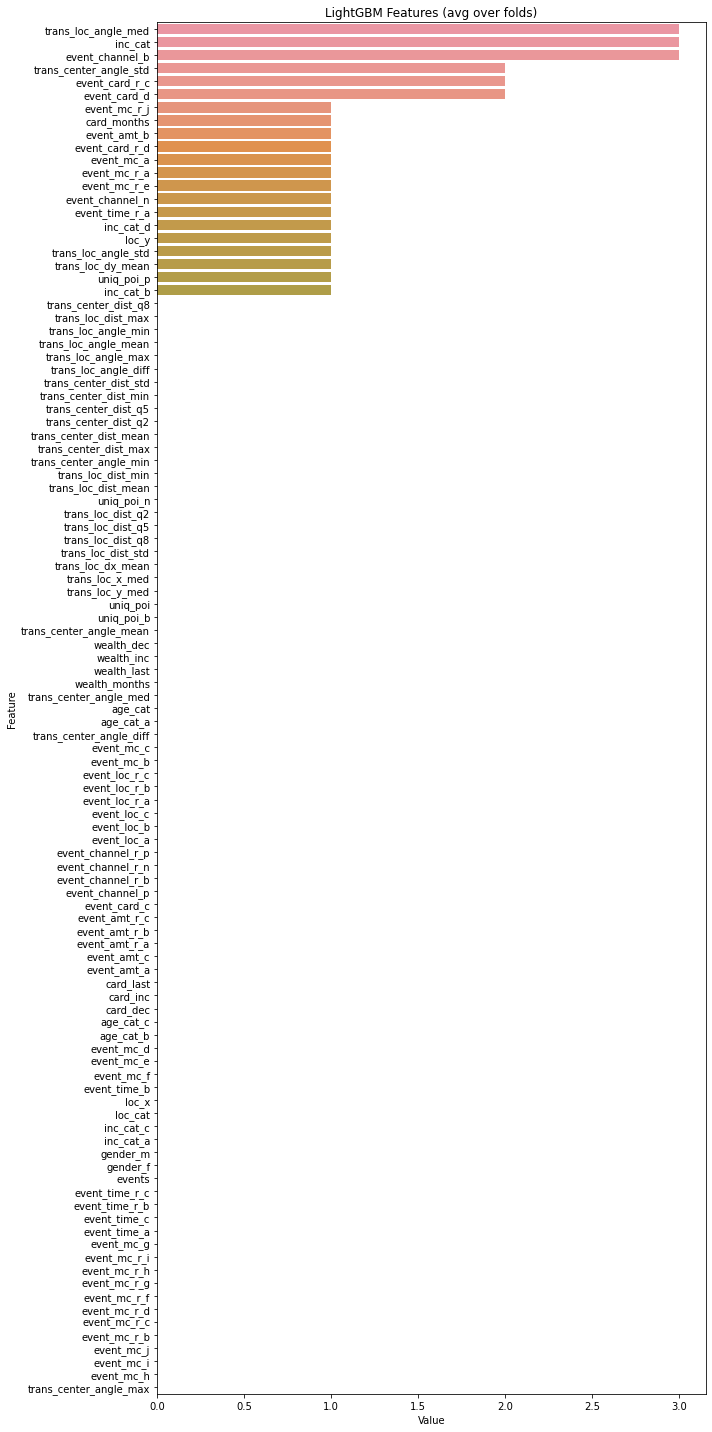

105
105


<Figure size 432x288 with 0 Axes>

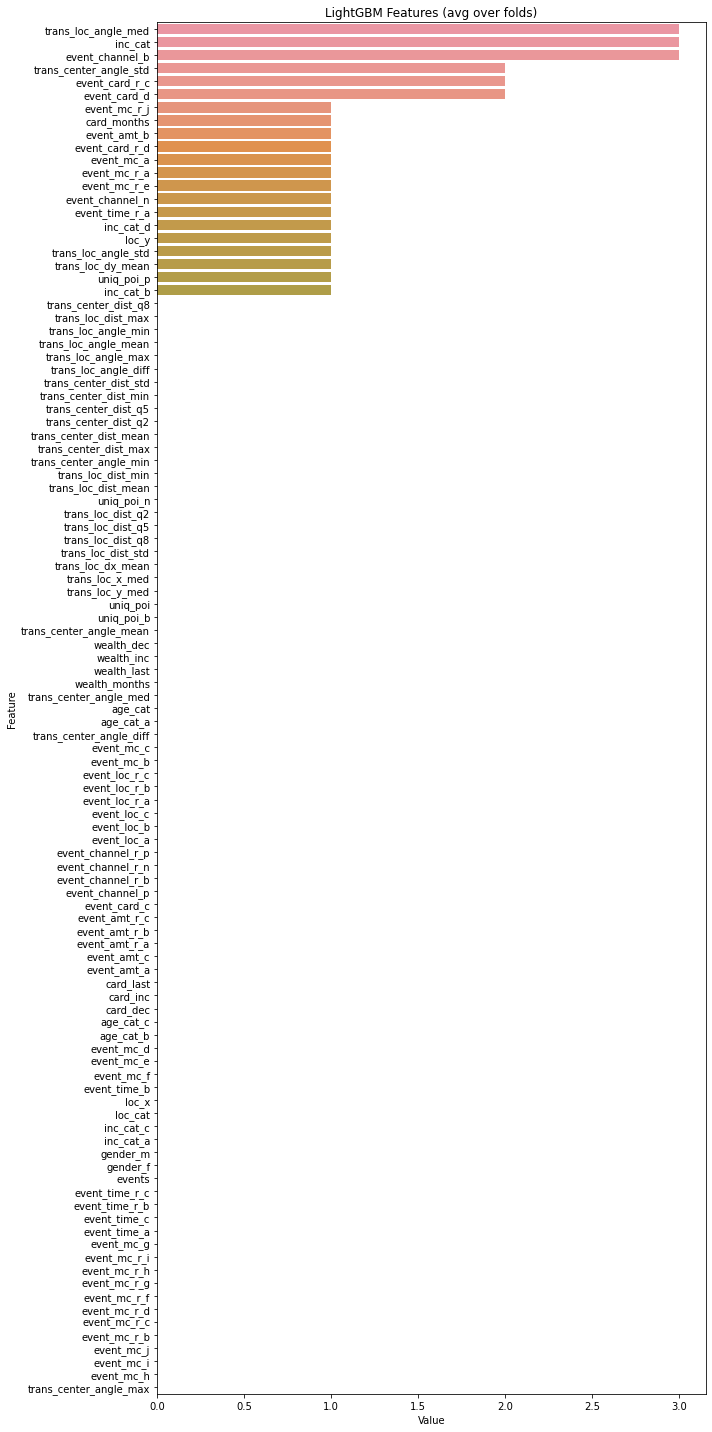

105
105


<Figure size 432x288 with 0 Axes>

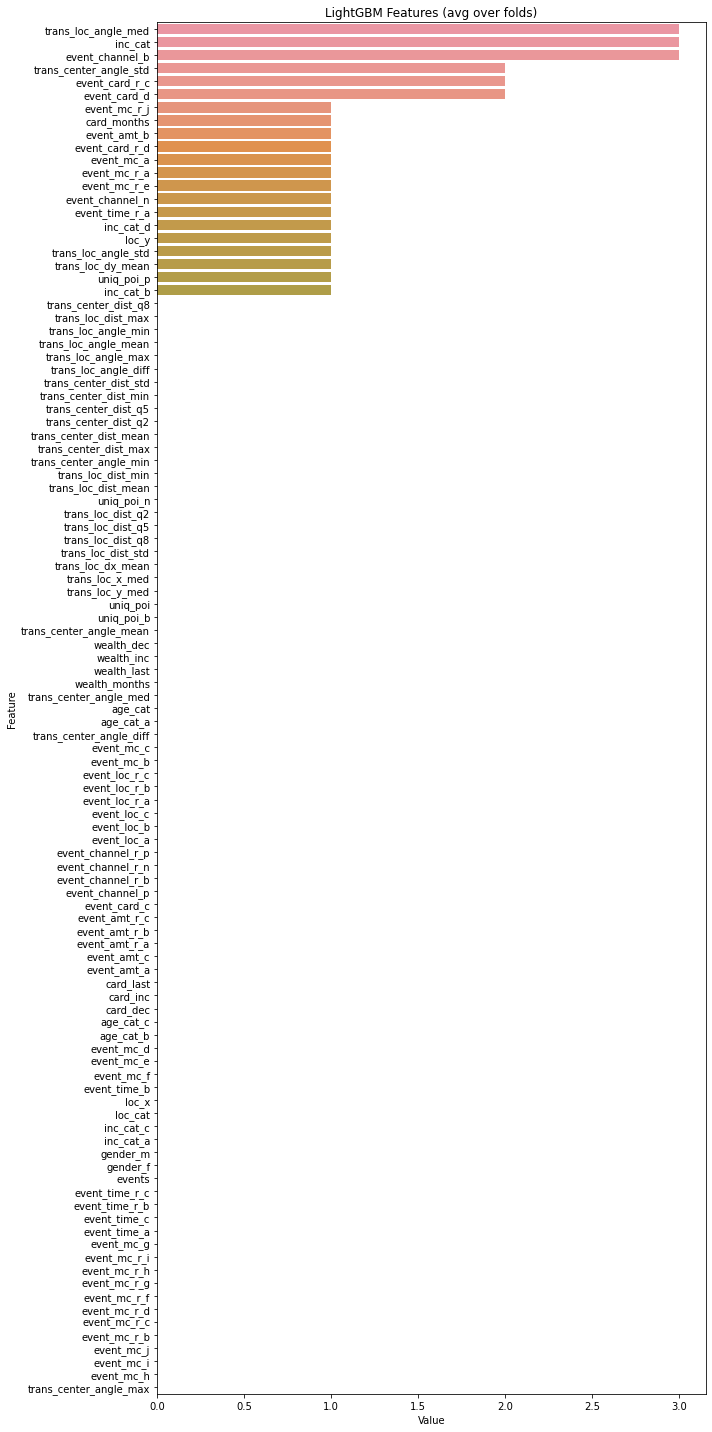

105
105


<Figure size 432x288 with 0 Axes>

In [ ]:
old_train_path = "features/features_users_2014.csv"
old_test_path = "features/features_users_2015.csv"
DX1, DY1 = evaluate(old_train_path, old_test_path)

In [ ]:
category_train_path = "automated_features/users_2014.csv"
category_test_path = "automated_features/users_2015.csv"
DX2, DY2 = evaluate(category_train_path, category_test_path)

In [ ]:
category_train_path = "automated_features/category_users_2014.csv"
category_test_path = "automated_features/category_users_2015.csv"
DX3, DY3 = evaluate(category_train_path, category_test_path)

In [ ]:
category_train_path = "automated_features/ord_category_users_2014.csv"
category_test_path = "automated_features/ord_category_users_2015.csv"
DX4, DY4 = evaluate(category_train_path, category_test_path)

In [ ]:
category_train_path = "automated_features/disp_category_users_2014.csv"
category_test_path = "automated_features/disp_category_users_2015.csv"
DX5, DY5 = evaluate(category_train_path, category_test_path)

In [ ]:
category_train_path = "automated_features/disp_coor_users_2014.csv"
category_test_path = "automated_features/disp_coor_users_2015.csv"
DX6, DY6 = evaluate(category_train_path, category_test_path)

In [ ]:
from matplotlib.ticker import NullFormatter

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
line1, = ax.plot(DX1, DY1, label='all features')
line2, = ax.plot(DX2, DY2, label='only user\'s features')
line3, = ax.plot(DX3, DY3, label='user\'s features + category')
line4, = ax.plot(DX4, DY4, label='user\'s features + category + mean category')
line5, = ax.plot(DX5, DY5, label='user\'s features + category + mean/disp category')
line6, = ax.plot(DX6, DY6, label='user\'s features + category + coordinates')

ax.legend()
plt.xlabel('learning_rate')
plt.ylabel('ROC-AUC')
plt.grid(True)
plt.show()

In [ ]:
from matplotlib.ticker import NullFormatter

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
# line1, = ax.plot(DX1, DY1, label='all features')
# line2, = ax.plot(DX2, DY2, label='only user\'s features')
line3, = ax.plot(DX3, DY3, label='user\'s features + category')
line4, = ax.plot(DX4, DY4, label='user\'s features + category + mean category')
# line5, = ax.plot(DX5, DY5, label='user\'s features + category + mean/disp category')

ax.legend()
plt.xlabel('learning_rate')
plt.ylabel('ROC-AUC')
plt.grid(True)
plt.show()